# Problem 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [296]:
import numpy as np   
import pandas as pd    

from sklearn import metrics

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [297]:
plt.style.use('ggplot')

**Data Ingestion:**
    
### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

**Importing data**

In [298]:
# reading the excel file into pandas dataframe

df_election = pd.read_excel("Election_Data.xlsx") 

In [299]:
df_election.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [300]:
df_election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [301]:
df_election.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [302]:
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


**We need some summary statistics of our dataframe. For this, we can use describe() method. It can be used to generate various summary statistics.**

In [303]:
df_election.describe(include='all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


**Insights**

•	All the columns have a count of 1525 values. Only “Age” is continuous feature. Others are Categorical - Ordinal values.

•	The “vote” column is the Target variable which is an object variable. “Labour” category is Top value which has 1063 values. The other category is “Conservative” which has 462 values.

•	“Age” is a continuous variable. The median value of “Age” is 53 years.

•	“economic.cond.national” and “economic.cond.household” columns has mean value of 3.24 and 3.14 respectively. 

•	“Blair”, the Labour leader has on an average 3.3 rating.

•	“Hague”, the conservative leader has on an average 2.7 rating.

•	“Europe” that measures respondents' attitudes toward European integration has an average value of 6.7 . 75% people have rated 10.

•	The “political.knowledge” column has mean value of 1.54 . 75% values are 2.

•	The “gender” column has Female on top with 812 values.





**Check for Object Data Type**

In [304]:
df_election.select_dtypes(include='object').head()

,vote,gender
0,Labour,female
1,Labour,male
2,Labour,male
3,Labour,female
4,Labour,male


•	There are two object datatypes. “vote” and “gender”.

In [305]:
# unique value in object datatype

for column in df_election.columns:
    if df_election[column].dtype == 'object':
        print(column.upper(),': ',df_election[column].nunique())
        print(df_election[column].value_counts().sort_values())

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER :  2
male      713
female    812
Name: gender, dtype: int64


In [306]:
# Checking for NULL Values

df_election.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no NULL value in data.

**Skewness of data**

Skewness assesses the extent to which a variable’s distribution is symmetrical

Kurtosis is a measure of whether the distribution is too peaked

For an ideal normal distribution (theoretical) Skewness and Kurtosis have to be between -1 to +1 Or we can say that if we are able to reduce the skewness and kurtosis from a very high value to lower values we are able to get the data distirbuted more normally.

In [307]:
df_election.skew()

Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

**Insights**

* 	The “age”,”Hague” columns are skewed right as it holds positive values
*	The rest of the columns are skewed towards left which is denoted by negative sign.
*	“Blair” feature is highly skewed.





In [308]:
df_election.kurtosis()

Unnamed: 0                -1.200000
age                       -0.946897
economic.cond.national    -0.255994
economic.cond.household   -0.206302
Blair                     -1.065582
Hague                     -1.391743
Europe                    -1.237841
political.knowledge       -1.216646
dtype: float64

### **1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.**

### EDA



In [309]:
## shape of dataset

print("no. of rows: ",df_election.shape[0], "\n""no. of columns: ",df_election.shape[1])

no. of rows:  1525 
no. of columns:  10


**Insights**
 
* There are 1525 rows and 10 columns.
* There are no missing values in dataset.


In [310]:
# Checking for NULL Values

df_election.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no NULL values in dataset.

In [311]:
#datatypes

df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


**Insights**
 
* The dataset has 10 columns. 8 columns in the data are numeric in nature ('int64' or 'float64' type). 
* The "vote" & “gender” columns are ‘object' datatype.



**Checking for duplicates**



In [312]:
# to find duplicates 

dups = df_election.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


There are no duplicate rows in dataset.

In [313]:
# The first column is s.no column which has nothing to do with the model attriibutes. So we shall drop it.

df_election.drop('Unnamed: 0', axis =1, inplace = True)

Droping "Unamed" column as it is insignificant

**Insights**
 
drop()  function is used to remove unwanted feature in dataset. The first column denotes Serial Number which has nothing to do with the model attributes. So we shall drop it.

In [314]:
df_election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


**Making different list for categorical columns and numerical columns**

In [315]:
cat=[]
num=[]
for i in df_election.columns:
    if df_election[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print("The categorical features ", cat) 
print("The numeric features ", num)

The categorical features  ['vote', 'gender']
The numeric features  ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


The above output shows that there is no “null” value in our dataset.

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables with values as “?”.

In [316]:
for variable in cat:
    print(variable,":", sum(df_election[variable] == '?'))

vote : 0
gender : 0


The output of the above code snippet shows that there are no "?" or " " present in the data set

**For Numeric Variable**

In [317]:
df_election_num = df_election.select_dtypes(include = ['float64', 'int64'])
numeric_columns = list(df_election_num.columns.values)
print("The number of Numeric columns in the dataset is: ",len(numeric_columns))

The number of Numeric columns in the dataset is:  7


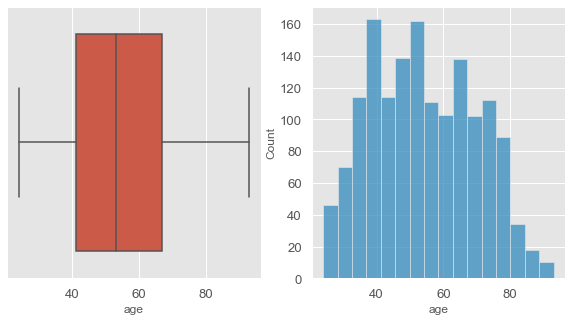

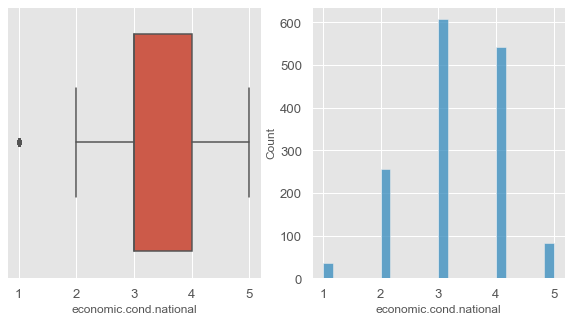

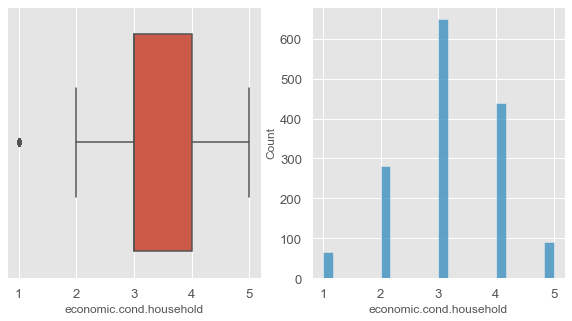

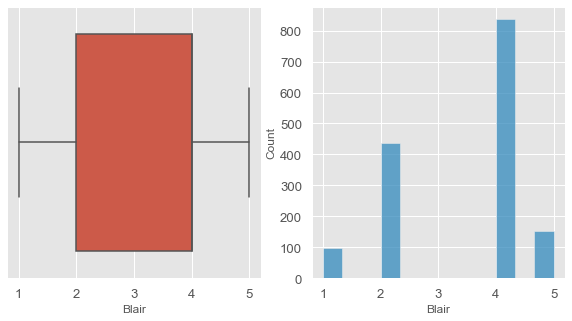

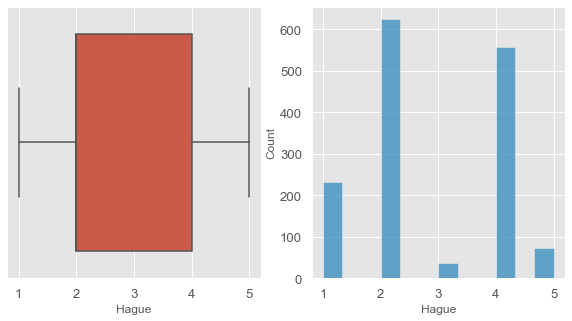

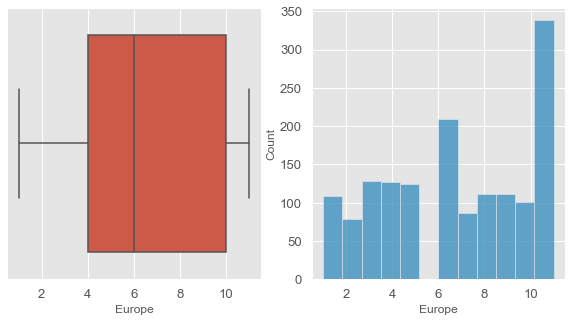

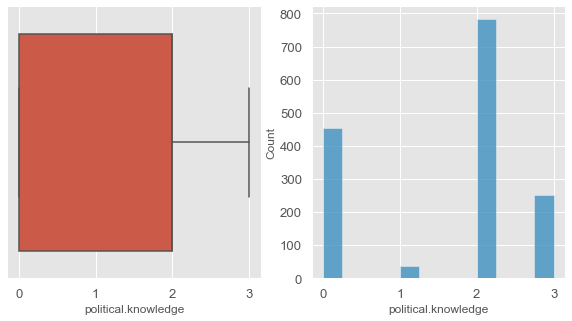

In [95]:
# visualize numerical features distribution using boxplot and histogram
feature_list = df_election_num.columns
for cols in feature_list:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df_election_num, x=cols)
    plt.subplot(1,2,2)
    sns.histplot(data=df_election_num, x=cols)
    plt.show()

**Insights**

•	There are 7 numeric fields in the data

•	Outliers are present in “economic.cond.national” and “economic.cond.household” numeric fields.

•	The median value for “Age” is around 50-55 years and it has uniform distribution

•	The “economic.cond.national” feature is an ordinal categorical feature with  code 3 sshowing highest. This denotes that People in Level 3 of current national economic conditions voted more	.

•	The “economic.cond.household” feature is an ordinal categorical feature with  code 3 sshowing highest. This denotes that People in Level 3 of current household economic conditions voted more	.

•	“Blair”, the Labour leader has rating “4” as highest. Around 836 people have assessed him with rating as 4.

•	“Hague”, the Conservative leader has rating “2.5 (plus)” as highest. Around 622 people have assessed him with rating as 2.

•	Around 338 people have ‘Eurosceptic’ sentiment as they have rated 11 which is the highest.

•	782 people have good assessment on Political Knowledge of parties' positions on European integration as they have rated 2 which is near highest value.


**Distribution Plot for Election Dataset**

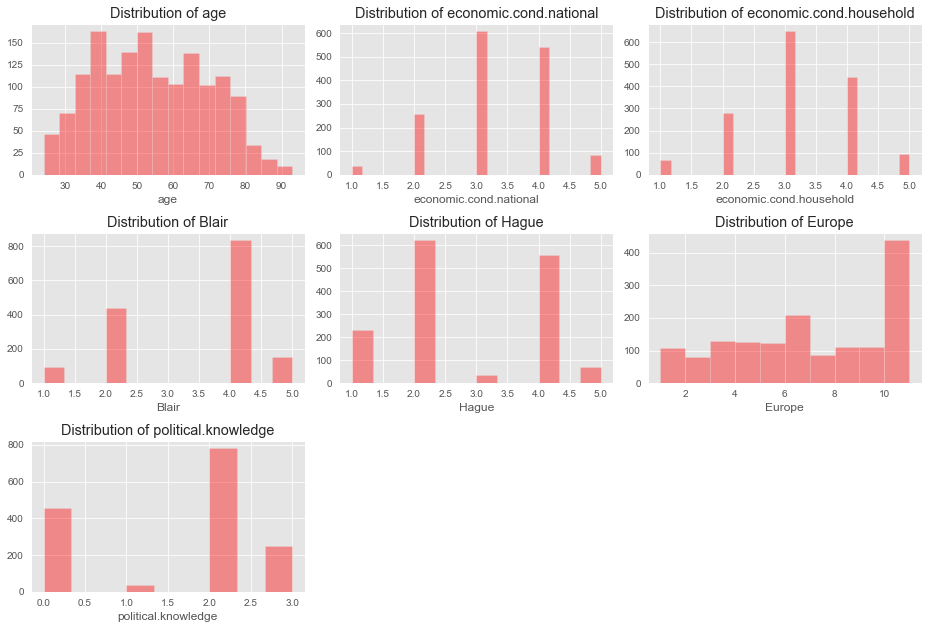

In [376]:
# using histplot on numeric columns

plt.figure(figsize = (13,20))
feature_list = df_election_num.columns
for i in range(len(feature_list)):
    plt.subplot(7, 3 ,i +1)
    sns.distplot(df_election_num[feature_list[i]], kde=False, color='r');
    plt.title('Distribution of {}'.format(feature_list[i]))
    plt.tight_layout()

**For Categorical Variable**

In [377]:
df_election_num.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

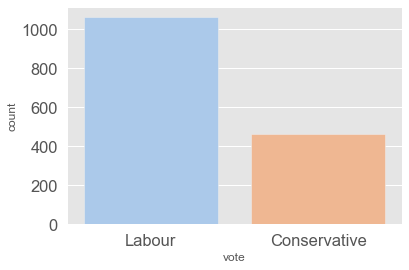

In [319]:
# using countplot for categorical variable

sns.countplot(x='vote', data=df_election, palette='pastel');

**Insights**

* Labour" party has maximum votes than “Conservative” party. 



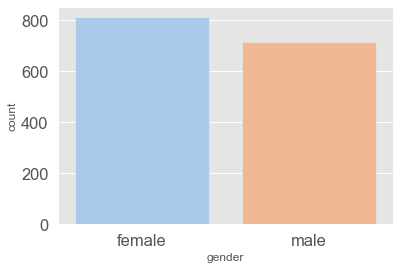

In [320]:
# using countplot for categorical variable

sns.countplot(x='gender', data=df_election, palette='pastel');

**Insights**

* "Female" have maximum count han “Male” party. 812 female voters and  713 male voters. 


**Checking Target Variable class proportion.**

In [85]:
# check target variable class proportion
df_election['vote'].value_counts(normalize=True).round(2)*100

Labour          70.0
Conservative    30.0
Name: vote, dtype: float64

**Bivariate Analysis**

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

**Pairplot : Continuous Features Vs Continuous Features**

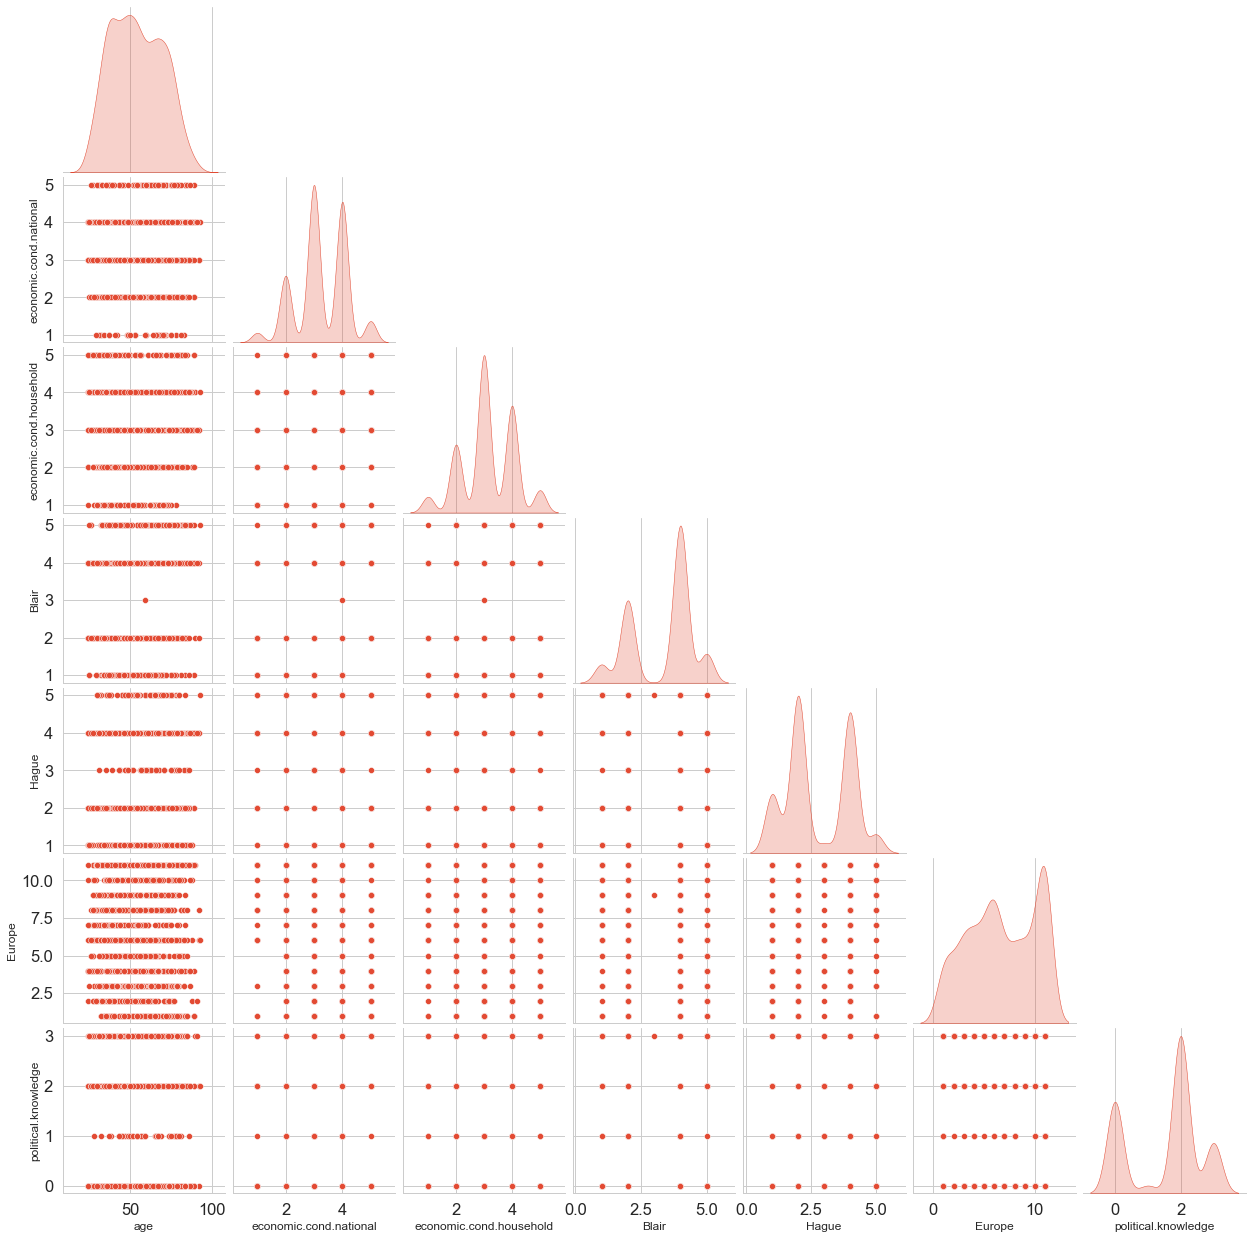

In [321]:
## Numeric vs Numeric

sns.set_style("whitegrid")
sns.pairplot(data = df_election_num, diag_kind="kde", corner=True);
plt.show();

**Insights**

* We can observe that there is no patterns present in any of the features which indicates that there is multicollinearity among the variables.

* The kde distribution denotes that there bimodal values in all features and its not symmetrical.


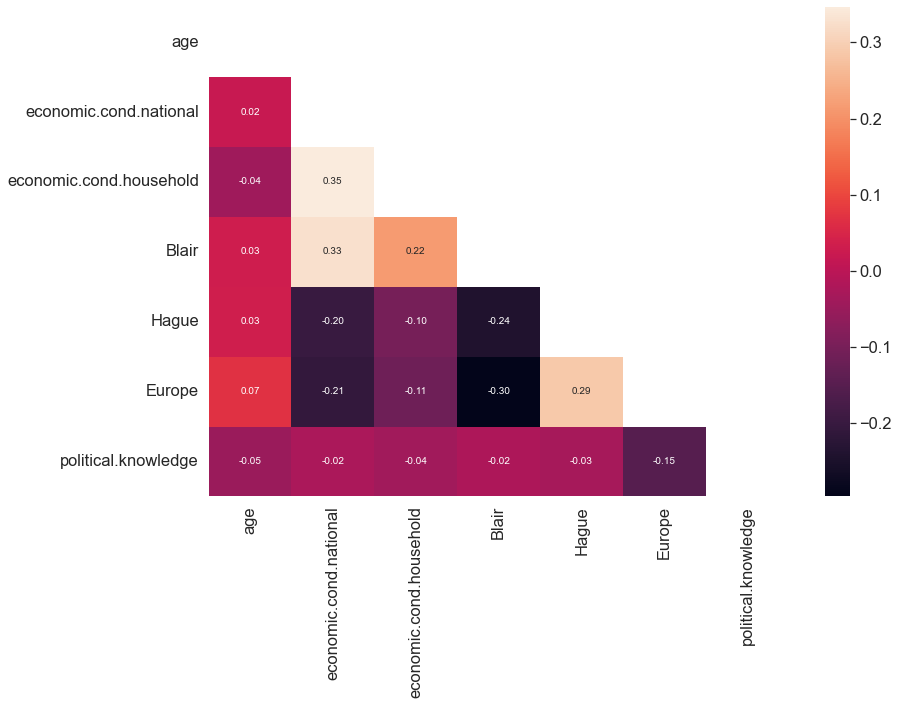

In [322]:
#to find correlation of data using Pearson Correlation

corr = df_election_num.corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(13,9))
sns.heatmap(df_election.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

**Insights**

* We can see that the correlation between the features is very less denoting no multicollinearity among features.


**Continuous Features vs Categorical Target Feature**

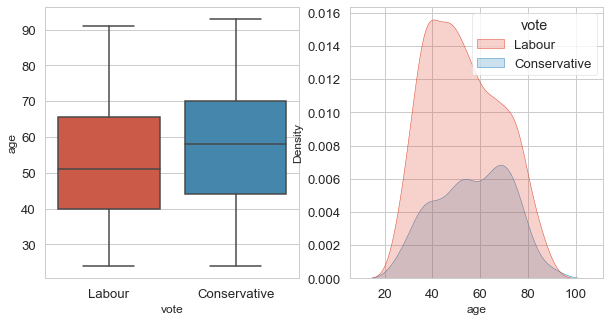

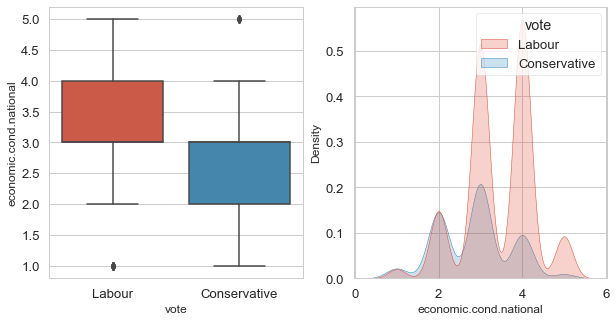

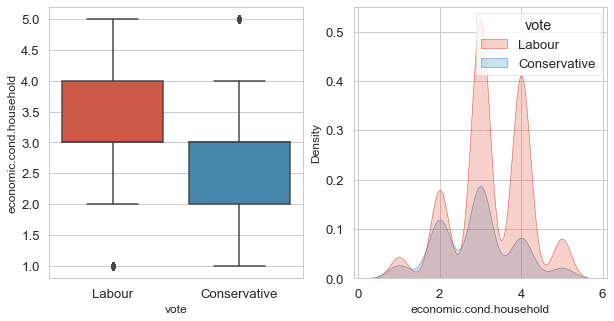

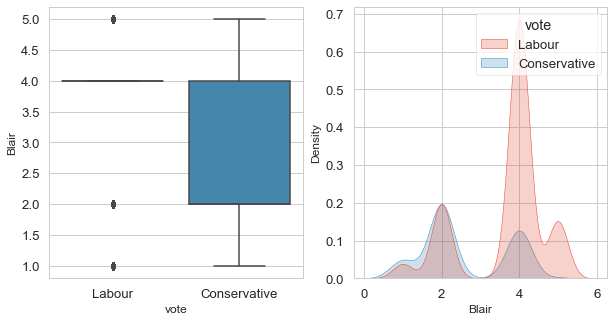

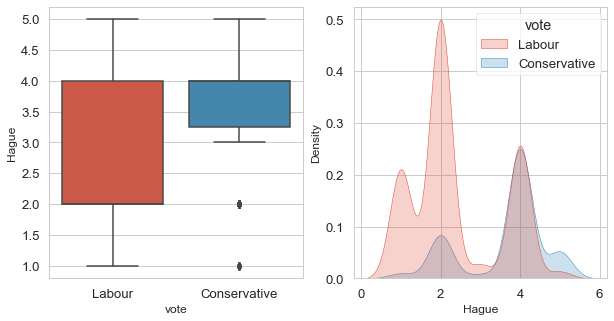

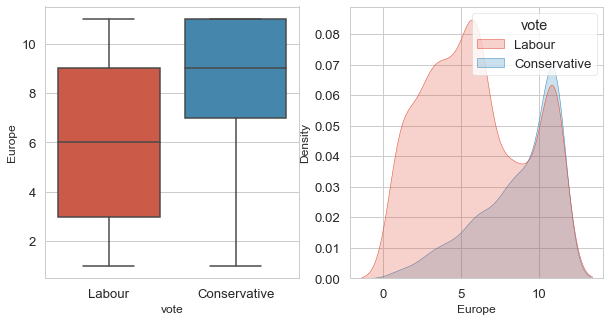

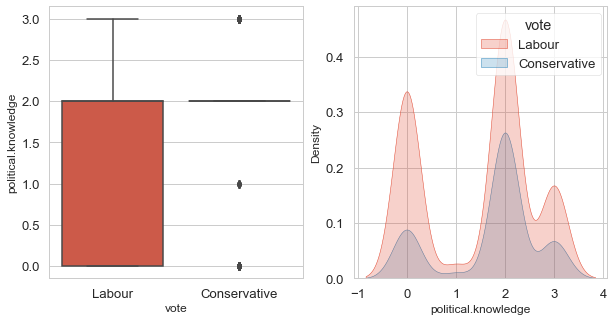

In [100]:
# visualize NUmeric features vs Categorical variable using boxplot and density plot
for cols in df_election_num.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df_election, x='vote', y=cols)
    plt.subplot(1,2,2)
    sns.kdeplot(data=df_election, x=cols, hue='vote', fill=True)
    plt.show()

**Insights**

*	The median value for Age is 53 years for people voted for Labour party and 55 years for people voted for Conservative party.
*	The “economic.cond.national” has outlier. It is bimodal as it has two peaks, at scale 3 & 4.
*	The “economic.cond.household” has outlier. It bimodal as it has two peaks, at scale 3 & 4.
*	The “Blair” has outliers. Since it is an ordinal feature the distribution is highest for scale 4 denoting that the Labour party leader has more trust among people.
*	The “Hague” feature has outliers. The distribution of Labour is low (scale 1,2) wehereas the Conservative party leader has received a scale of 4.
*	On an average, the ‘Eurosceptic’ sentiment among Labour party supporters are less compared to Conservative party supporters based on the median value of “Europe” feature.
*	The “political.knowledge” has outliers. The Knowledge of parties' positions on European integration is rated high for Labour party supporters.


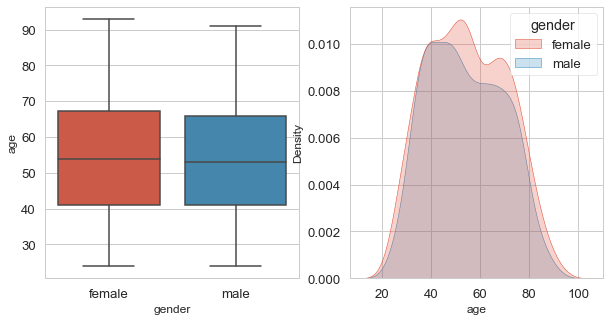

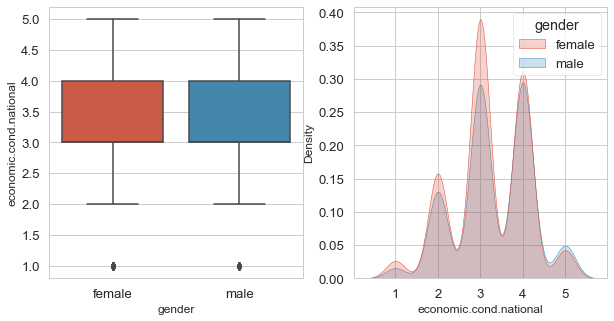

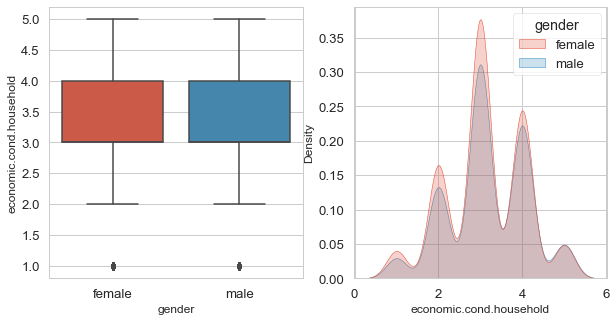

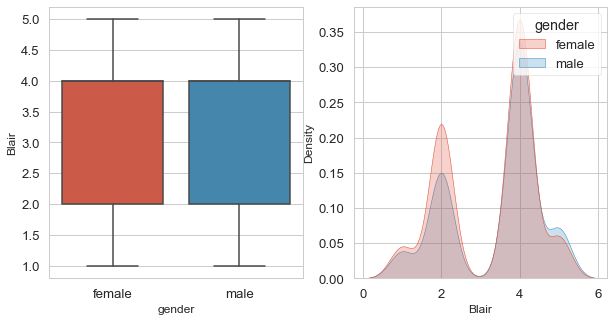

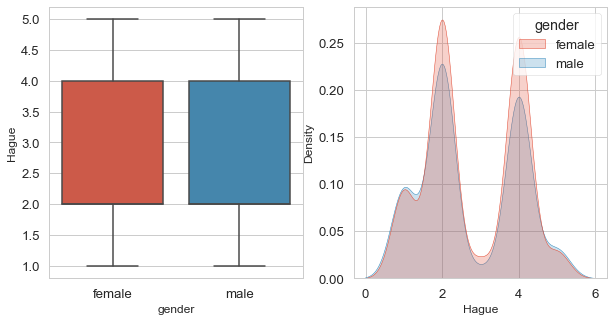

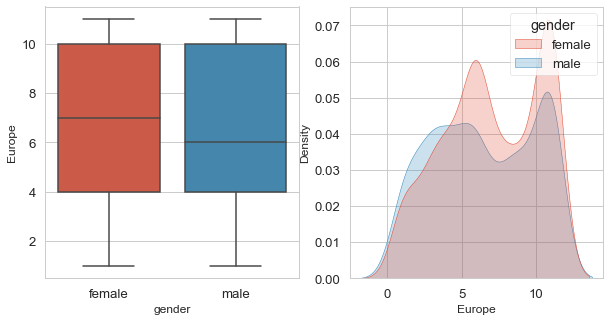

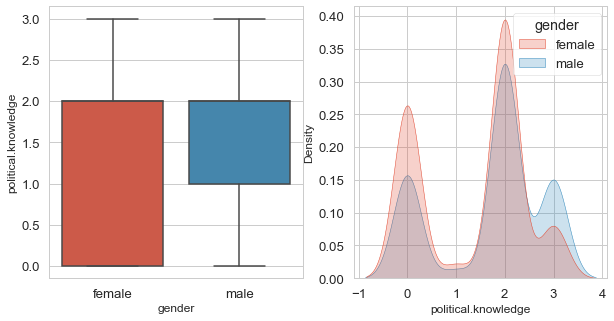

In [101]:
# visualize Numeric features vs Categorical variable using boxplot and density plot
for cols in df_election_num.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df_election, x='gender', y=cols)
    plt.subplot(1,2,2)
    sns.kdeplot(data=df_election, x=cols, hue='gender', fill=True)
    plt.show()

**Insights**

*	The median value of Females who voted in Election is 53 years which is higher than Male.
*	The female voters have “economic.cond.national” scale as 3 & 4 which is highest denoting their current national economic conditions.
*	The “economic.cond.household” assessment for Female voters are highest as 3&4 compared to Male voters.
*	There is an equal support for both Labour & Conservative party leaders Blair & Hague. But on the whole the number of Female voters slightly outweigh the male.
*	The ‘Eurosceptic’ sentiment on an average, it is Highest for Female than Male.
*	On Knowledge of parties positions on European integration, the Male slightly outweigh female, in terms of scale of 0 to 3.


**Categorical Independent Features vs Target Feature**

In [86]:
# create a list of categorical feature names called catcols
catcols = df_election.select_dtypes(include='object').columns.tolist()
catcols

['vote', 'gender']

In [87]:
# remove target variable from catcols
catcols.remove('vote')
catcols

['gender']

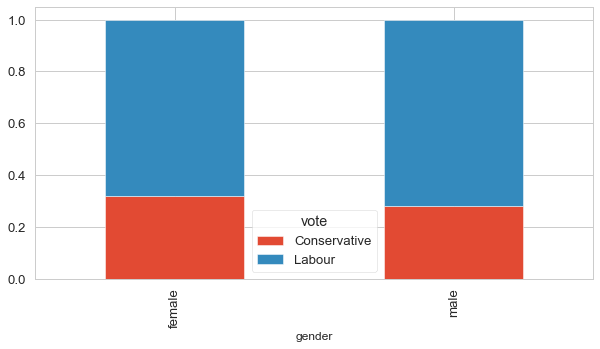

In [102]:
# cross tabulation of categorical features with target variable & plot as 100% stacked bar chart
for cols in catcols:
    tab = pd.crosstab(df_election[cols], df_election['vote'], normalize='index').round(2)
    tab.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

**Insights**

* The Female & Male Labour Party supporters are higher. 
* For Conservative Party, Female supporters are higher than Male.




**Checking for Outliers**

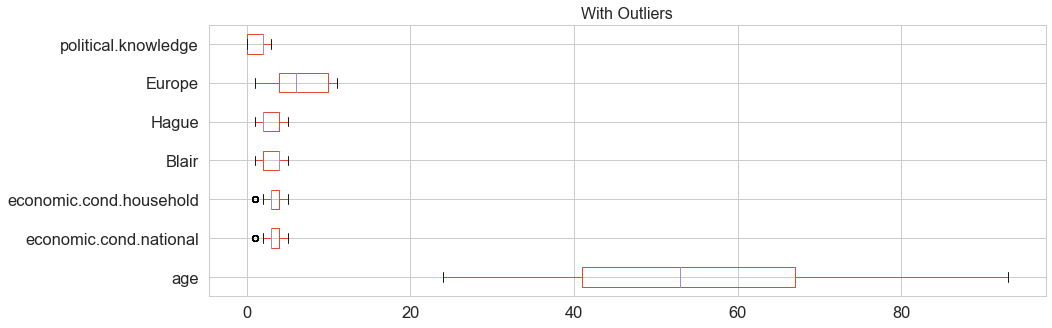

In [323]:
# constructing box plot for continuous variables

cont=df_election.dtypes[(df_election.dtypes!='object')].index
plt.figure(figsize=(15,5))
df_election[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

We can see that "economic.cond.national" , "economic.cond.household" variables have presence of Outliers. There are nearly no outliers in most of the numerical columns. In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier .

**Outlier Treatment**

In [104]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [105]:
for column in df_election[cont].columns:
    lr,ur=remove_outlier(df_election[column])
    df_election[column]=np.where(df_election[column]>ur,ur,df_election[column])
    df_election[column]=np.where(df_election[column]<lr,lr,df_election[column])

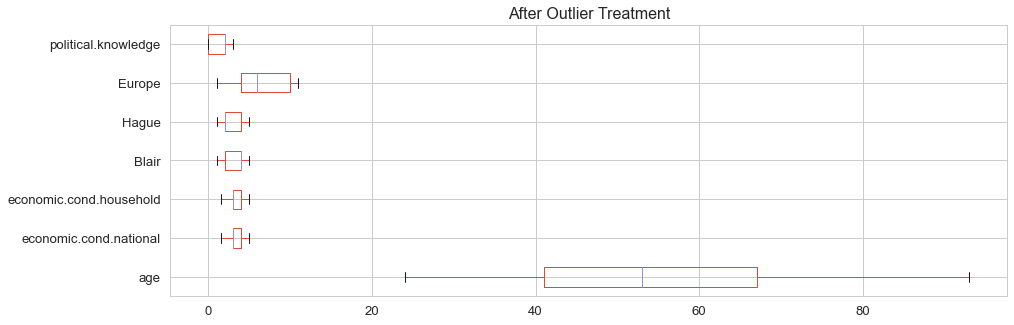

In [106]:
plt.figure(figsize=(15,5))
df_election[cont].boxplot(vert=0)
plt.title('After Outlier Treatment',fontsize=16)
plt.show()

We can observe that there are no outliers for any columns.

**Data Preparation:**

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

**Creating Dummy Variables using One Hot Encoding**

We create 2 simple true or false columns with titles equivalent to "Is this vote for Labour or Conservative?" and the Gender as "Whether Male or Female". These will be used as independent variables.

We will also be dropping first column to ensure that there is no linear dependency between the other columns and to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity.

In [422]:
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   object 
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   float64
 5   Hague                    1525 non-null   float64
 6   Europe                   1525 non-null   float64
 7   political.knowledge      1525 non-null   float64
 8   gender                   1525 non-null   object 
dtypes: float64(7), object(2)
memory usage: 107.4+ KB


In [423]:
df_election.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [107]:
# drop_first=True will drop one of the three origin columns

df_election = pd.get_dummies(df_election, columns=["gender"], drop_first=True)
df_election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,Labour,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,Labour,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,Labour,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


**Converting Target variable to Categorical code**

In [108]:
df_election['vote']=np.where(df_election['vote'] =='Labour', '1', df_election['vote'])
df_election['vote']=np.where(df_election['vote'] =='Conservative', '0', df_election['vote'])

In [109]:
df_election['vote'] = df_election['vote'].astype('int64')

In [110]:
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   int64  
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   float64
 5   Hague                    1525 non-null   float64
 6   Europe                   1525 non-null   float64
 7   political.knowledge      1525 non-null   float64
 8   gender_male              1525 non-null   uint8  
dtypes: float64(7), int64(1), uint8(1)
memory usage: 96.9 KB


**Is Scaling necessary here or not?** 

Machine learning scaling is part of data preparation as  this technique brings data points that are far from each other closer in order to increase the algorithm effectiveness and speed up the Machine Learning processing. Scaling data enables the model to learn and actually understand the problem.

**Need for Scaling**

Data set has features with different “weights”. In “Distance” based algorithms it is recommended to transform the features so that all features are in same “scale”.


**Most commonly used scaling techniques are**

           1) Z-Score 
                                       Z = (X - μ ) / σ
o	Scaled data will have mean tending to 0 and standard deviation tending to 1
o	Used in weight based techniques (PCA, Neural Network etc.)

          2) Min-Max
                                       (X-Xmin)/(Xmax-Xmin)
o	Scaled data will range between 0 and 1
o	Used in distance based techniques (Clustering, KNN etc.)


In [111]:
df_election.std()

vote                        0.459685
age                        15.711209
economic.cond.national      0.852938
economic.cond.household     0.885286
Blair                       1.174824
Hague                       1.230703
Europe                      3.297538
political.knowledge         1.083315
gender_male                 0.499109
dtype: float64

In [112]:
df_election.var()

vote                         0.211310
age                        246.842075
economic.cond.national       0.727503
economic.cond.household      0.783731
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
gender_male                  0.249110
dtype: float64

**Insights:**

•	We can see that Standard deviation is different for different features.

•	Variance of all features are not equal.


 It is always adviced to scale numeric attributes in models that calculate distances. Scaling has to be done after the Split of data into rain and Test.
 
 

**Data Split: Split the data into train and test (70:30).**

**Seggregating Features and Target**

### Feature Engineering

In [113]:
# seggregate target feature from the rest
X = df_election.drop('vote', axis=1)
y = df_election['vote']

In [114]:
y.value_counts()

1    1063
0     462
Name: vote, dtype: int64

We can see the Class Imbalance in the Target variable.

### **Train-Test Split**

Split X and y into training and test set in 70:30 ratio with random_state=1

In [115]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Data is now splitted to X and Y into train and test sets in a 70:30 ratio.

In [116]:
y_train.value_counts(1)

1    0.688847
0    0.311153
Name: vote, dtype: float64

In [117]:
y_test.value_counts(1)

1    0.716157
0    0.283843
Name: vote, dtype: float64

In [118]:
#X_train.shape

print("No. of rows in X_Train: ",X_train.shape[0], "\n""No. of columns in X_Train: ",X_train.shape[1])

No. of rows in X_Train:  1067 
No. of columns in X_Train:  8


In [438]:
#X_test.shape

print("No. of rows in X_Test: ",X_test.shape[0], "\n""No. of columns in X_Test: ",X_test.shape[1])

No. of rows in X_Test:  458 
No. of columns in X_Test:  8


In [439]:
#y_train.shape

print("No. of rows in y_Train: ",y_train.shape[0])
print(y_train.value_counts())

No. of rows in y_Train:  1067
1    735
0    332
Name: vote, dtype: int64


In [440]:
#y_test.shape

print("No. of rows in y_Test: ",y_test.shape[0])
print(y_test.value_counts())

No. of rows in y_Test:  458
1    328
0    130
Name: vote, dtype: int64


In [441]:
# check target variable class proportion
df_election['vote'].value_counts(normalize=True).round(2)*100

1    70.0
0    30.0
Name: vote, dtype: float64

**SCALING THE DATA**

convert the features into Standardized form as we do not know what units / scales were used and store them in new dataframe
It is always adviced to scale numeric attributes in models that calculate distances.

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler_min = MinMaxScaler()

X_train_scaled = scaler_min.fit_transform(X_train)
X_test_scaled = scaler_min.transform(X_test)


In [120]:
# create dataframes of scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [121]:
# verify scaling by checking the mean and standard deviation
X_train_scaled.describe().round(2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00
mean,0.44,0.51,0.48,0.59,0.44,0.57,0.52,0.48
std,0.23,0.25,0.25,0.29,0.31,0.33,0.36,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.43,0.43,0.25,0.25,0.30,0.00,0.00
50%,0.43,0.43,0.43,0.75,0.25,0.50,0.67,0.00
75%,0.64,0.71,0.71,0.75,0.75,0.90,0.67,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both models (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

**Model 1**

In [123]:
# Fit the model on original data i.e. before upsampling
model_logistic = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=2)
model_logistic.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   23.4s finished


LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

**Model 2**

In [124]:
model_logistic_1 = LogisticRegression(solver='saga',max_iter=1000,penalty='l2',verbose=True,n_jobs=2)
model_logistic_1.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 768 epochs took 1 seconds


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=1000, n_jobs=2, solver='saga', verbose=True)

**Model 3**

In [125]:
model_logistic_2 = LogisticRegression(tol= 0.0001, solver='lbfgs',penalty='l2')
model_logistic_2.fit(X_train, y_train)

LogisticRegression()

**Predicting on Training and Test dataset**

In [126]:
ytrain_predict_log = model_logistic.predict(X_train)
ytest_predict_log = model_logistic.predict(X_test)

**Getting the Predicted Classes and Probs**

In [127]:
ytest_predict_prob_log=model_logistic.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,0.921946,0.078054
1,0.690526,0.309474
2,0.346669,0.653331
3,0.488887,0.511113
4,0.158897,0.841103


### LDA Model

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Model 1**

In [129]:
#Build LDA Model

lda = LinearDiscriminantAnalysis()
model_lda=lda.fit(X_train_scaled, y_train)
model_lda

LinearDiscriminantAnalysis()

**Model 2**

In [130]:
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage = 'auto', )
model_lda_1=lda.fit(X_train_scaled, y_train)
model_lda_1

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

**Predicting on Training and Test dataset**

In [131]:
# Training Data Class Prediction with a cut-off value of 0.5
y_train_predict_lda = model_lda.predict(X_train_scaled)

# Test Data Class Prediction with a cut-off value of 0.5
y_test_predict_lda = model_lda.predict(X_test_scaled)

**Probability prediction for the training and test data**

In [132]:
# Training Data Probability Prediction
y_train_predict_prob_lda = model_lda.predict_proba(X_train_scaled)

# Test Data Probability Prediction
y_test_predict_prob_lda = model_lda.predict_proba(X_test_scaled)

In [133]:
pd.DataFrame(y_test_predict_prob_lda).head()

,0,1
0,0.943417,0.056583
1,0.743056,0.256944
2,0.340433,0.659567
3,0.496549,0.503451
4,0.140949,0.859051


**Accuracy**

**a) Logistic Regression**

In [134]:
# Accuracy - Training Data - Logistic
log_train = model_logistic.score(X_train, y_train)
print("The Accuracy of Train data using Logistic Regression Model is ", log_train)

The Accuracy of Train data using Logistic Regression Model is  0.8406747891283973


In [135]:
# Accuracy - Testing Data - Logistic
log_test = model_logistic.score(X_test, y_test)
print("The Accuracy of Test data using Logistic Regression Model is ", log_test)

The Accuracy of Test data using Logistic Regression Model is  0.8209606986899564


**b) LDA**

In [136]:
# Accuracy - Training Data - LDA
lda_train = model_lda.score(X_train_scaled, y_train)
print("The Accuracy of Train data using LDA Model is ", lda_train)

The Accuracy of Train data using LDA Model is  0.8397375820056232


In [137]:
# Accuracy - Test Data - LDA
lda_test = model_lda.score(X_test_scaled, y_test)
print("The Accuracy of Test data using LDA Model is ", lda_test)

The Accuracy of Test data using LDA Model is  0.8187772925764192


**Validness of models (over fitting or under fitting)**

**Insights**

**Logistic**
*	After using various parameters, Model 1 of Logistic Regression performs better than others. 
*	The below tabulation shows the detailed list of parameters tried for Modelling.
* •	The Accuracy of Train data is 0.840 and Test data is 0.820. It is not overfitted or underfitted model.
*	When we use solver='saga' and penalty='l2' in Model 2, the model underperformed in F1-Score and Accuracy.
*	Since there is a Class Imbalance, we cannot trust Accuracy as a metric. 
*	Hence for this Problem both Recall & Precision is equally important. 
*	Thus we chose F1-score as a metric to find the best model. Hence Model 1 of Logistic is chosed.

**LDA**
* 	After using various parameters, Model 1 of LDA performs better than others. 
*	The below tabulation shows the detailed list of parameters tried for Modelling.
*	The Accuracy of Train data is 0.839 and Test data is 0.818. It is not overfitted or underfitted model.
*	While using solver = “lsqr”, and shrinkage =”auto”, the model had better accuracy as 0.84 & 0.82 for Train & Test data but underperformed F1-score.
*	Since there is a Class Imbalance, we cannot trust Accuracy as a metric. 
*	Hence for this Problem both Recall & Precision is equally important. 
*	Thus we chose F1-score as a metric to find the best model. Hence Model 1 of LDA is chosed.




### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### **KNN MODEL**

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered since KNN uses the 'distance' calculations.

We will use Min-max scaler to achieve this objective.

In [138]:
# import KNNClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier #, KNeighborsRegressor, RadiusNeighborsClassifier, RadiusNeighborsRegressor

**Model 1**

In [139]:
# create model object with default parameter values and fit on training data
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

**Model 2**

In [141]:
knn_1 = KNeighborsClassifier(n_neighbors = 10)
knn_1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

**Model 3**

In [144]:
knn_2 = KNeighborsClassifier(n_neighbors = 15)
knn_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

**Finding best k value**

In [146]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(X_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn_new.score(X_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.21834061135371174,
 0.19432314410480345,
 0.17685589519650657,
 0.15720524017467252,
 0.16812227074235808,
 0.17030567685589515,
 0.17685589519650657,
 0.1746724890829694,
 0.1746724890829694,
 0.1746724890829694]

**Model 4**

In [147]:
knn_3 = KNeighborsClassifier(n_neighbors = 6)
knn_3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [148]:
knn_pred_train = knn_3.predict(X_train_scaled)
knn_pred_test = knn_3.predict(X_test_scaled)

**Plot misclassification error vs k (with k value on X-axis) using matplotlib**

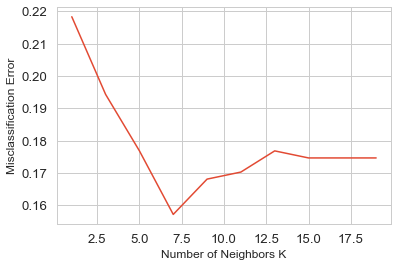

In [149]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Thus k=6 is the best value for k as MCE value is less

### **Naive Bayes**

In [150]:
# import GaussianNB from sklearn
from sklearn.naive_bayes import GaussianNB #, MultinomialNB, BernoulliNB

In [151]:
# create model object and fit on training data
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

In [152]:
# predict on training data
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)

**Accuracy**

**a)Naive Bayes**

In [153]:
# Accuracy - Training Data

print("The Accuracy of Train data using Naive Bayes Model is ",nb.score(X_train, y_train))

The Accuracy of Train data using Naive Bayes Model is  0.8322399250234301


In [154]:
# Accuracy - Test Data

print("The Accuracy of Test data using Naive Bayes Model is ",nb.score(X_test, y_test))

The Accuracy of Test data using Naive Bayes Model is  0.8231441048034934


**b) KNN**

In [155]:
# Accuracy - Training Data

print("The Accuracy of Train data using KNN Model is ", knn_3.score(X_train_scaled, y_train))

The Accuracy of Train data using KNN Model is  0.8575445173383318


In [156]:
# Accuracy - Test Data

print("The Accuracy of Test data using KNN Model is ",knn_3.score(X_test_scaled, y_test))

The Accuracy of Test data using KNN Model is  0.8165938864628821


**Validness of models (over fitting or under fitting)**

**Insights**

**KNN Model**

*	After using various parameters, Model 4 of KNN performs better than others. 
*	The below tabulation shows the detailed list of parameters tried for Modelling.
*	We used scaled data as input values.
*	The Accuracy of Train data is 0.86 and Test data is 0.8169. It is not overfitted or underfitted model as the difference between train and test accuracies is less than 10%, it is a valid model.
*	While using n_neighbors  = 10, the model had better accuracy as 0.85 & 0.82 for Train & Test data but underperformed F1-score.
*	Since there is a Class Imbalance, we cannot trust Accuracy as a metric. 
*	Hence for this Problem both Recall & Precision is equally important. 
*	Thus we chose F1-score as a metric to find the best model. Hence Model 4 of KNN is chosed.


**Naive Bayes Model**


*	After using various parameters, Model 1 of Naïve Bayes performs better than others. 
*	The below tabulation shows the detailed list of parameters tried for Modelling.
*	We did not use scaled data as input values.
*	The Accuracy of Train data is 0.832 and Test data is 0.823. It is slightly overfitted model as the difference between train & test accuracy is less.
*	The performance of F1-score comparatively better than other models.
*	Since there is a Class Imbalance, we cannot trust Accuracy as a metric. 
*	Hence for this Problem both Recall & Precision is equally important. 
*	Thus we chose F1-score as a metric to find the best model. Hence Model 1 of Naïve Bayes is chosed.


### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

**Model Tuning**

Model tuning is the experimental process of finding the optimal values of hyperparameters to maximize model performance. Hyperparameters are the set of variables whose values cannot be estimated by the model from the training data. These values control the training process. Model tuning is also known as hyperparameter optimization.

**Need for Model Tuning**

The purpose of tuning a model is to ensure that it performs at its best. This process involves adjusting various elements of the model to achieve optimal results. By fine-tuning the model, we can maximize its performance and get the highest rate of performance possible.

**Types of Model Tuning**

Manual model tuning: In this method, hyperparameter values are set based on intuition or past experience. The model is then trained and evaluated to determine the performance using the respective set of hyperparameters. Adjustments are made and this process is continued till optimal value for each hyperparameter is found.

Automated model tuning: In this method, optimal hyperparameter values are found using algorithms. Here, we define a hyperparameter search space from which the optimal set of hyperparameter values is selected. Some of the popular algorithms for doing automated hyperparameter tuning are

**Grid search:** The user defines a set of values for each hyperparameter to form a grid. Different combinations of these hyperparameter values are tried and the combination which yields the best result is selected as the final set of optimal hyperparameters. The process is very resource-intensive as the algorithm trains one model for each set of possible hyperparameter combinations.

**Random search:** The user here also defines a set of hyperparameter values but here the algorithm will only try random combinations of hyperparameter values rather than every possible combination. The combination that yields the best result from this is selected as the optimal set of hyperparameters.

**Bayesian search:** Bayesian hyperparameter tuning, also known as Bayesian optimization, methods keeps track of past evaluation results to form the information used to make future decisions in selecting future hyperparameter values. Bayesian hyperparameter tuning is efficient because it chooses the hyperparameter values in an informed manner.

**Grid Search on Random Forest**

In [2]:
from sklearn.ensemble import RandomForestRegressor

### **Ensemble RandomForest Classifier**

In [3]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 12],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50],
    'n_estimators': [50, 150]
}

rfr = RandomForestRegressor(random_state=123)

grid_search_rf = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5 )

NameError: name 'GridSearchCV' is not defined

In [ ]:
grid_search_rf.fit(X_train,Y_train)

In [160]:
print(grid_search_rf.best_params_)

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 150}


In [161]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,max_depth = 7, max_features = 4, min_samples_leaf = 3, min_samples_split = 30)
rfcl = rfcl.fit(X_train, y_train)

In [162]:
## Performance Matrix on train data set
y_train_predict = rfcl.predict(X_train)
y_test_predict = rfcl.predict(X_test)
model_score =rfcl.score(X_train, y_train)
print("The Model score is", model_score)
print("The confusion matrix \n", metrics.confusion_matrix(y_train, y_train_predict))
print("\nTrain data\n", metrics.classification_report(y_train, y_train_predict))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict))

The Model score is 0.85941893158388
The confusion matrix 
 [[238  94]
 [ 56 679]]

Train data
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       332
           1       0.88      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067


Test data
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



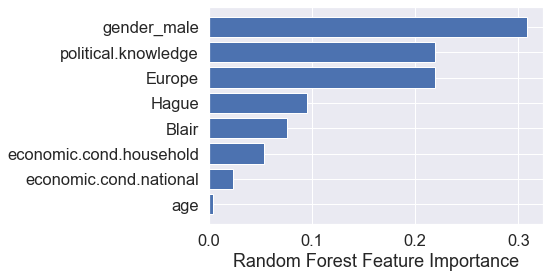

In [207]:
sns.set(font_scale=1.5)
sorted_idx = rfcl.feature_importances_.argsort()
plt.barh(X_train.columns,rfcl.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

**Insights:**

•	We can observe that “gender_male” is more important feature 

•	Followed by “political.knowledge” and “Europe” feature.

•	.The least important feature is “Age”

•	The top 5 most important features are : [gender_male, ‘political.knowledge’ , ‘Europe’ ,'Hague', ‘Blair’]

•	Thus Gender plays an important role in predicting the Exit poll of the Election.


### **Ensemble Learning - Bagging**

In [163]:
from sklearn.ensemble import BaggingRegressor

In [164]:
param_grid_bg = {
    'n_estimators': [5, 50],
    'max_samples': [50, 150],
    'max_features': [5, 15],
    'random_state': [1, 150]
}

bg = BaggingRegressor(random_state=1)

grid_search_bg = GridSearchCV(estimator = bg, param_grid = param_grid_bg, cv = 3 )

In [165]:
grid_search_bg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=BaggingRegressor(random_state=1),
             param_grid={'max_features': [5, 15], 'max_samples': [50, 150],
                         'n_estimators': [5, 50], 'random_state': [1, 150]})

In [166]:
print(grid_search_bg.best_params_)

{'max_features': 5, 'max_samples': 150, 'n_estimators': 50, 'random_state': 1}


In [167]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=rfcl, max_features=5,random_state=1,n_estimators =50,max_samples =150)
bgcl = bgcl.fit(X_train, y_train)

In [168]:
## Performance Matrix on train data set
y_train_predict = bgcl.predict(X_train)
y_test_predict = bgcl.predict(X_test)
model_score =bgcl.score(X_train, y_train)
print("The Model score is", model_score)
print("The confusion matrix \n", metrics.confusion_matrix(y_train, y_train_predict))
print("\nTrain data\n", metrics.classification_report(y_train, y_train_predict))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict))

The Model score is 0.8191190253045924
The confusion matrix 
 [[179 153]
 [ 40 695]]

Train data
               precision    recall  f1-score   support

           0       0.82      0.54      0.65       332
           1       0.82      0.95      0.88       735

    accuracy                           0.82      1067
   macro avg       0.82      0.74      0.76      1067
weighted avg       0.82      0.82      0.81      1067


Test data
               precision    recall  f1-score   support

           0       0.77      0.56      0.65       130
           1       0.84      0.93      0.89       328

    accuracy                           0.83       458
   macro avg       0.81      0.75      0.77       458
weighted avg       0.82      0.83      0.82       458



### **Ensemble Learning - AdaBoosting**

In [169]:
from sklearn.ensemble import AdaBoostRegressor

In [170]:
param_grid_ada = {
    'n_estimators': [200, 500],
    'learning_rate': [1, 5],
    'random_state': [1, 150]
}

ada = AdaBoostRegressor(random_state=1)

grid_search_ada = GridSearchCV(estimator = ada, param_grid = param_grid_ada, cv = 3 )

In [171]:
grid_search_ada.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=1),
             param_grid={'learning_rate': [1, 5], 'n_estimators': [200, 500],
                         'random_state': [1, 150]})

In [172]:
print(grid_search_ada.best_params_)

{'learning_rate': 1, 'n_estimators': 200, 'random_state': 1}


In [173]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=200, random_state=1 ,learning_rate = 1 )
abcl = abcl.fit(X_train, y_train)

In [174]:
## Performance Matrix on train data set
y_train_predict = abcl.predict(X_train)
y_test_predict = abcl.predict(X_test)
model_score =abcl.score(X_train, y_train)
print("The Model score is", model_score)
print("The confusion matrix \n", metrics.confusion_matrix(y_train, y_train_predict))
print("\nTrain data\n", metrics.classification_report(y_train, y_train_predict))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict))

The Model score is 0.8462980318650422
The confusion matrix 
 [[237  95]
 [ 69 666]]

Train data
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.82      0.81      0.82      1067
weighted avg       0.84      0.85      0.84      1067


Test data
               precision    recall  f1-score   support

           0       0.67      0.68      0.68       130
           1       0.87      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



### **Ensemble Learning - GradientBoost**

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

In [237]:
param_grid_gbs = {
    'n_estimators': [100, 500],
    'learning_rate': [1, 5],
    'random_state': [1, 150]
}

gbs = GradientBoostingRegressor(random_state=1)

grid_search_gbs = GridSearchCV(estimator = gbs, param_grid = param_grid_gbs, cv = 3, scoring = 'f1' )

In [238]:
grid_search_gbs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'learning_rate': [1, 5], 'n_estimators': [100, 500],
                         'random_state': [1, 150]},
             scoring='f1')

In [239]:
print(grid_search_gbs.best_params_)

{'learning_rate': 1, 'n_estimators': 100, 'random_state': 1}


In [240]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [241]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
y_test_predict = gbcl.predict(X_test)
model_score =gbcl.score(X_train, y_train)
print("The Model score is", model_score)
print("The confusion matrix \n", metrics.confusion_matrix(y_train, y_train_predict))
print("\nTrain data\n", metrics.classification_report(y_train, y_train_predict))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict))

The Model score is 0.8865979381443299
The confusion matrix 
 [[262  70]
 [ 51 684]]

Train data
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067


Test data
               precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



**Insights**

•	We can observe that Accuracy of Gradient Boosting Model is comparatively higher than other models.

•	The F1- score of Gradient Boosting Model is highest compared to other models.

•	Random Forest model is also performing well in terms of F1-score.

Feature Importance

•	The independent variables are categorical ordinal features.

•	The scaled data is not used in any these algorithms as it does not cause any change

•	The “Europe” feature, “Political Knowledge “and “gender” feature in categorical and  “age” feature in continuous numeric is very important feature in Election dataset.


### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

**Model Evaluation**

In this problem, F1-score metric is more important to identify which party will win because REcall & Precision is both important metric here.

## 1. Accuracy

**a) Logistic Regression**

In [181]:
# Accuracy - Training Data - Logistic
log_train = model_logistic.score(X_train, y_train)
print("The Accuracy of Train data using Logistic Regression Model is ", log_train)

The Accuracy of Train data using Logistic Regression Model is  0.8406747891283973


In [182]:
# Accuracy - Testing Data - Logistic
log_test = model_logistic.score(X_test, y_test)
print("The Accuracy of Test data using Logistic Regression Model is ", log_test)

The Accuracy of Test data using Logistic Regression Model is  0.8209606986899564


**b) LDA**

In [183]:
# Accuracy - Training Data - LDA
lda_train = model_lda.score(X_train_scaled, y_train)
print("The Accuracy of Train data using LDA Model is ", lda_train)

The Accuracy of Train data using LDA Model is  0.8397375820056232


In [184]:
# Accuracy - Test Data - LDA
lda_test = model_lda.score(X_test_scaled, y_test)
print("The Accuracy of Test data using LDA Model is ", lda_test)

The Accuracy of Test data using LDA Model is  0.8187772925764192


**c) Naive Bayes**

In [185]:
# Accuracy - Training Data - LDA

print("The Accuracy of Train data using Naive Bayes Model is ", nb.score(X_train, y_train))

The Accuracy of Train data using Naive Bayes Model is  0.8322399250234301


In [186]:
print("The Accuracy of Test data using Naive Bayes Model is ",nb.score(X_test, y_test))

The Accuracy of Test data using Naive Bayes Model is  0.8231441048034934


**d) KNN**

In [187]:
# Accuracy - Training Data - KNN

print("The Accuracy of Train data using KNN Model is ", knn_3.score(X_train_scaled, y_train))

The Accuracy of Train data using KNN Model is  0.8575445173383318


In [188]:
# Accuracy - Test Data - KNN
print("The Accuracy of Test data using KNN Model is ",knn_3.score(X_test_scaled, y_test))

The Accuracy of Test data using KNN Model is  0.8165938864628821


**e)Random Forest Model**

In [189]:
# Accuracy - Training Data - RF

print("The Accuracy of Train data using Random Forest Model is ", rfcl.score(X_train, y_train))

The Accuracy of Train data using Random Forest Model is  0.85941893158388


In [190]:
# Accuracy - Test Data - RF

print("The Accuracy of Test data using Random Forest Model is ",rfcl.score(X_test, y_test))

The Accuracy of Test data using Random Forest Model is  0.8296943231441049


**f)Bagging Model**

In [191]:
# Accuracy - Training Data - bagging

print("The Accuracy of Train data using Bagging Model is ", bgcl.score(X_train, y_train))

The Accuracy of Train data using Bagging Model is  0.8191190253045924


In [192]:
# Accuracy - Test Data - bagging
print("The Accuracy of Test data using Bagging Model is ",bgcl.score(X_test , y_test))

The Accuracy of Test data using Bagging Model is  0.8275109170305677


**g)Adaboosting Model**

In [193]:
# Accuracy - Training Data - ADA

print("The Accuracy of Train data using AdaBoosting Model is ", abcl.score(X_train , y_train))

The Accuracy of Train data using AdaBoosting Model is  0.8462980318650422


In [194]:
# Accuracy - Test Data - ADA

print("The Accuracy of Test data using AdaBoosting Model is ",abcl.score(X_test , y_test))

The Accuracy of Test data using AdaBoosting Model is  0.8165938864628821


**h)Gradient boosting Model**

In [195]:
# Accuracy - Training Data - LDA

print("The Accuracy of Train data using Gradient Boosting Model is ", gbcl.score(X_train, y_train))

The Accuracy of Train data using Gradient Boosting Model is  0.8865979381443299


In [197]:
print("The Accuracy of Test data using Gradient Boosting Model is ",gbcl.score(X_test, y_test))

The Accuracy of Test data using Gradient Boosting Model is  0.8318777292576419


## 2. CONFUSION MATRIX

Training Data and Test Data Confusion Matrix Comparison

**a) Logistic Regression**

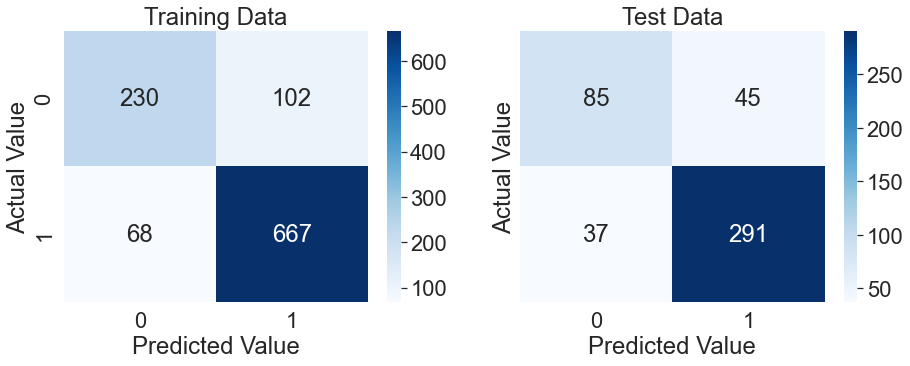

In [784]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_log)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_log)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights:**

•	TP value is 667 in Train data and 291 in Test Data. 

•	Comparatively higher FP which is 102 in Train data and 45 in Test data.

•	FN is 68 & 37 in Train &Test data.

•	TN value is 230 and 85 in Train & Test data.


**b) LDA**

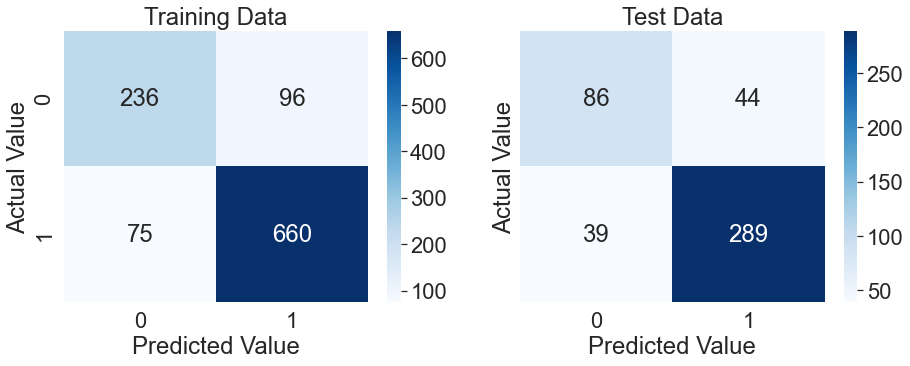

In [781]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False ,figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict_lda)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict_lda)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights:**

•	TP value is 660 in Train data and 289 in Test Data. 

•	Comparatively higher FP which is 96 in Train data and 44 in Test data.

•	FN is 75 & 39 in Train &Test data.

•	TN value is 236 and 86 in Train & Test data.


**c) Gaussian Naive Bayes**

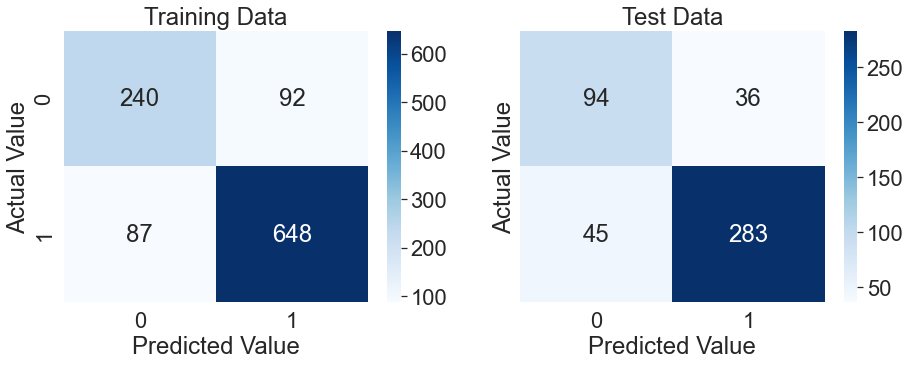

In [785]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,nb_pred_train)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,nb_pred_test)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights**

•	TP value is 648 in Train data and 283 in Test Data. 

•	Comparatively higher FP which is 92 in Train data and 36 in Test data.

•	FN is 87 & 45 in Train &Test data.

•	TN value is 240 and 94 in Train & Test data.


**d) KNN Model**

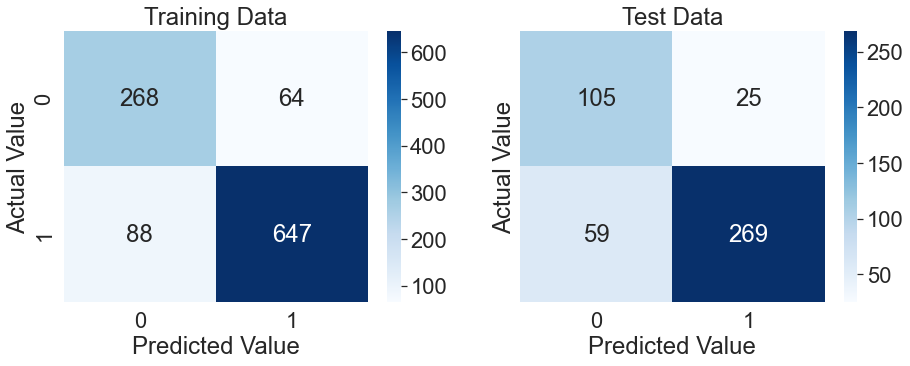

In [786]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,knn_pred_train)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,knn_pred_test)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights**

•	TP value is 647 in Train data and 269 in Test Data. 

•	Comparatively higher FP which is 64 in Train data and 25 in Test data.

•	FN is 88 & 59 in Train &Test data.

•	TN value is 268 and 105 in Train & Test data.


**e)Random Forest Model**

In [199]:
y_predict_rf_train = rfcl.predict(X_train)
y_predict_rf_test = rfcl.predict(X_test)

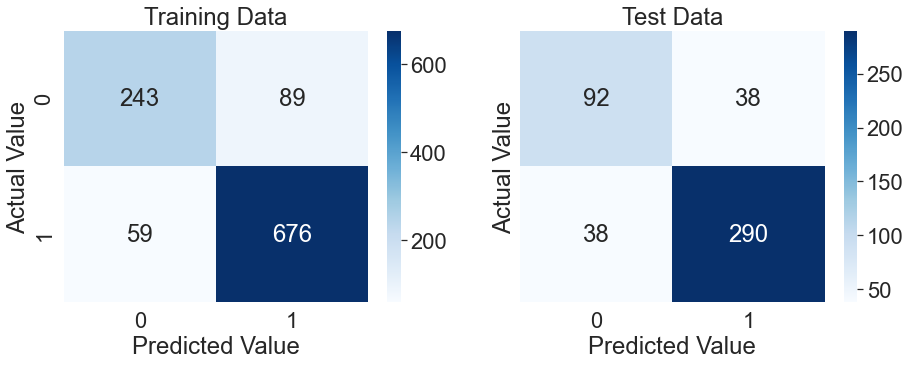

In [789]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_predict_rf_train)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_predict_rf_test)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights**

•	TP value is 676 in Train data and 290 in Test Data. 

•	Comparatively higher FP which is 89 in Train data and 38 in Test data.

•	FN is 59 & 38 in Train &Test data.

•	TN value is 243 and 92 in Train & Test data.


**f)Bagging Model**

In [200]:
y_predict_bag_train = bgcl.predict(X_train)
y_predict_bag_test = bgcl.predict(X_test)

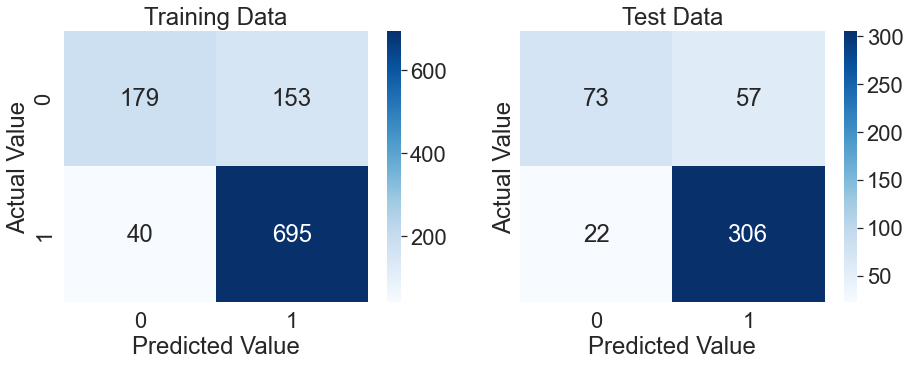

In [796]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_predict_bag_train)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_predict_bag_test)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights**

•	TP value is 695 in Train data and 306 in Test Data. 

•	Comparatively higher FP which is 153 in Train data and 57 in Test data.

•	FN is 40 & 22 in Train &Test data.

•	TN value is 179 and 73 in Train & Test data.


**g)Adaboosting Model**

In [201]:
# Adaboosting

y_predict_adb_train = abcl.predict(X_train)
y_predict_adb_test = abcl.predict(X_test)

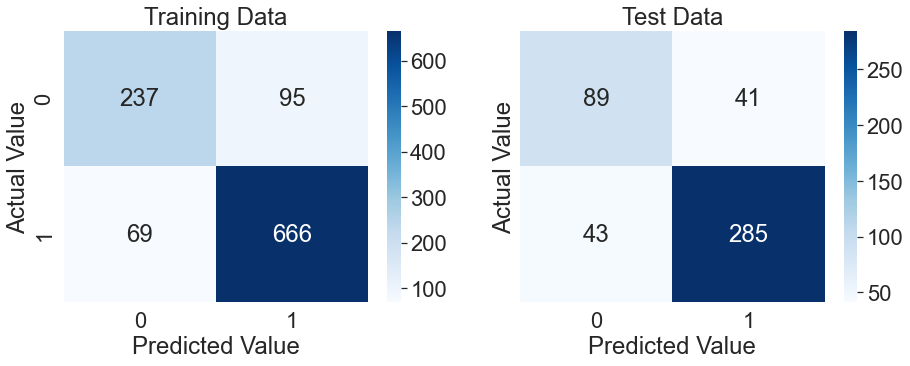

In [799]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_predict_adb_train)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_predict_adb_test)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights**

•	TP value is 666 in Train data and 285 in Test Data. 

•	Comparatively higher FP which is 95 in Train data and 41 in Test data.

•	FN is 69 & 43 in Train &Test data.

•	TN value is 237 and 89 in Train & Test data.


**h)Gradient boosting Model**

In [202]:
#Gradientboosting

y_predict_grb_train = gbcl.predict(X_train)
y_predict_grb_test = gbcl.predict(X_test)

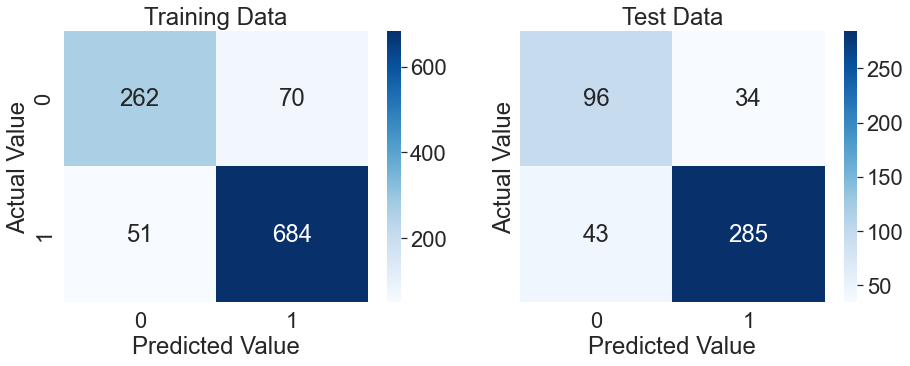

In [802]:
sns.set(font_scale=2.0)
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_predict_grb_train)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
a[0][0].set_ylabel('Actual Value')
a[0][0].set_xlabel('Predicted Value')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_predict_grb_test)),cmap = plt.cm.Blues,annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
a[0][1].set_ylabel('Actual Value')
a[0][1].set_xlabel('Predicted Value');

**Insights**

•	TP value is 684 in Train data and 285 in Test Data. 

•	Comparatively higher FP which is 70 in Train data and 34 in Test data.

•	FN is 51 & 43 in Train &Test data.

•	TN value is 262 and 96 in Train & Test data.


## 3. CLASSIFICATION REPORT

Training Data and Test Data Classification Report Comparison

**a) Logistic Regression**

In [203]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_log),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_log),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



**Insights:**

•	We can see that F1-score score of the Logistic Model is 0. 73 & 0.67 for Class 0 and 0.89 & 0.88 for Class 1.

•	The Precision score is 0.77 & 0.70 for Class 0 and 0.87 & 0.87 for Class 1. This seems to be slightly overfitted.

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.



**b) LDA**

In [811]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



**Insights:**

•	We can see that F1-score score of the LDA  Model is 0. 73 & 0.67 for Class 0 and 0.89 & 0.87 for Class 1. 

•	The Precision score is 0.76 & 0.69 for Class 0 and 0.87 & 0.87 for Class 1. This seems to be slightly overfitted.

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.


**c) Naive Bayes**

In [812]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,nb_pred_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classi0.fication_report(y_test,nb_pred_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458
 



**Insights**

•	We can see that F1-score score of the Naïve Bayes Model is 0. 73 & 0.70 for Class 0 and 0.88 & 0.87 for Class 1. 

•	The Precision score is 0.73 & 0.68 for Class 0 and 0.88 & 0.89 for Class 1. This seems to be slightly overfitted.

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.


**d)KNN Model**

In [813]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,knn_pred_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,knn_pred_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.81      0.78       332
           1       0.91      0.88      0.89       735

    accuracy                           0.86      1067
   macro avg       0.83      0.84      0.84      1067
weighted avg       0.86      0.86      0.86      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.81      0.71       130
           1       0.91      0.82      0.86       328

    accuracy                           0.82       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.84      0.82      0.82       458
 



**Insights**

•	We can see that F1-score score of the KNN Model is 0. 78 & 0.71 for Class 0 and 0.89 & 0.86 for Class 1. 

•	The Precision score is 0.75 & 0.64 for Class 0 and 0.91 & 0.91 for Class 1. This seems to be slightly overfitted.

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.


**e)Random Forest Model**

In [816]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_predict_rf_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_predict_rf_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.73      0.77       332
           1       0.88      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458
 



**Insights**

•	We can see that F1-score score of the Random Forest Model is 0. 77 & 0.71 for Class 0 and 0.90 & 0.88 for Class 1. 

•	The Precision score is 0.80 & 0.71 for Class 0 and 0.88 & 0.88 for Class 1. This seems to be slightly overfitted.

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.


**f)Bagging Model**

In [817]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_predict_bag_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_predict_bag_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.54      0.65       332
           1       0.82      0.95      0.88       735

    accuracy                           0.82      1067
   macro avg       0.82      0.74      0.76      1067
weighted avg       0.82      0.82      0.81      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.56      0.65       130
           1       0.84      0.93      0.89       328

    accuracy                           0.83       458
   macro avg       0.81      0.75      0.77       458
weighted avg       0.82      0.83      0.82       458
 



**Insights**

•	We can see that F1-score score of the Bagging Model is 0. 65 & 0.65 for Class 0 and 0.88 & 0.89 for Class 1. 

•	The Precision score is 0.82 & 0.77 for Class 0 and 0.82 & 0.84 for Class 1. This seems to be slightly overfitted.

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.


**g) Adaboosting Model**

In [818]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_predict_adb_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_predict_adb_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.82      0.81      0.82      1067
weighted avg       0.84      0.85      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.68      0.68       130
           1       0.87      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458
 



**Insights**

•	We can see that F1-score score of the Adaptive Boosting Model is 0. 74 & 0.68 for Class 0 and 0.89 & 0.87 for Class 1. 

•	The Precision score is 0.77 & 0.67 for Class 0 and 0.88 & 0.87 for Class 1. 

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.


**h) Gradient Boosting**

In [819]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_predict_grb_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_predict_grb_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



**Insights**

•	We can see that F1-score score of the Gradient Boosting Model is 0.81 & 0.71 for Class 0 and 0.92 & 0.88 for Class 1. 

•	The Precision score is 0.84 & 0.69 for Class 0 and 0.91 & 0.89 for Class 1. 

•	Considering this Problem, the F1-score is taken and hence the model is not overfitted or underfitted for F1-score and it is a valid model.


## 4. AUC & ROC CURVE

### **a) Logistic Regression**

**AUC and ROC for the training data**

AUC score of Train data using Logistic Model is: 0.890


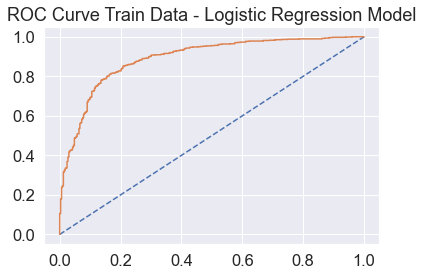

In [823]:
# predict probabilities
sns.set(font_scale=1.5)
probs = model_logistic.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_log = roc_auc_score(y_train, probs)
print('AUC score of Train data using Logistic Model is: %.3f' % auc_log)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - Logistic Regression Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the Logistic Model is 0.89. This means that 89% chance that the model will be able to distinguish between positive class and negative class.

**AUC and ROC for the test data**

AUC score of Test data using Logistic Model is: 0.883


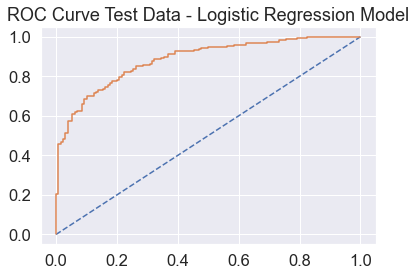

In [825]:
# predict probabilities
probs = model_logistic.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC score of Test data using Logistic Model is: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - Logistic Regression Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in Logistic Model is 0.883. This means that 88.3% chance that the model will be able to distinguish between positive class and negative class.

### **b) LDA**

**AUC and ROC for the training data**

AUC score of Train data using LDA Model is: 0.889


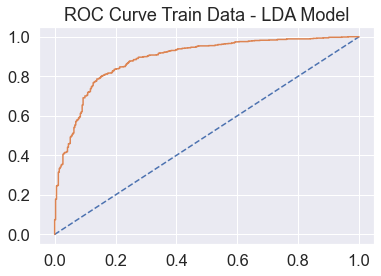

In [826]:
# predict probabilities
probs = model_lda.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_lda = roc_auc_score(y_train, probs)
print('AUC score of Train data using LDA Model is: %.3f' % train_auc_lda)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - LDA Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the LDA Model is 0.889. This means that 88.9% chance that the model will be able to distinguish between positive class and negative class.

**AUC and ROC for the test data**

AUC score of Test data using LDA is: 0.884


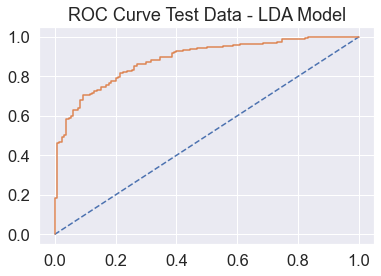

In [827]:
# predict probabilities
probs = model_lda.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_lda = roc_auc_score(y_test, probs)
print('AUC score of Test data using LDA is: %.3f' % test_auc_lda)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - LDA Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in Logistic Model is 0.884. This means that 88.4% chance that the model will be able to distinguish between positive class and negative class.

**c) GUASSIAN NAIVE BAYES**

**AUC and ROC for the train data**

AUC score of Train data using Naïve Bayes Model is: 0.887


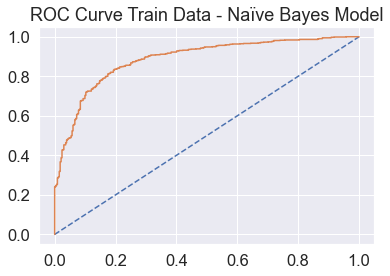

In [829]:
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_lda = roc_auc_score(y_train, probs)
print('AUC score of Train data using Naïve Bayes Model is: %.3f' % train_auc_lda)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - Naïve Bayes Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the Naive Bayes  Model is 0.887. This means that 88.7% chance that the model will be able to distinguish between positive class and negative class.

**AUC and ROC for the test data**

AUC score of Test data using Naïve Bayes is: 0.885


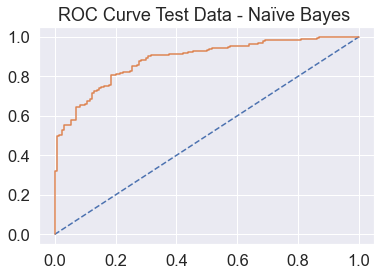

In [830]:
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_cart = roc_auc_score(y_test, probs)
print('AUC score of Test data using Naïve Bayes is: %.3f' % test_auc_cart)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - Naïve Bayes ")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in Naive Bayes  Model is 0.885. This means that 88.5% chance that the model will be able to distinguish between positive class and negative class.

**d) KNN**

**AUC and ROC for the train data**

AUC score of Train data using KNN Model is: 0.928


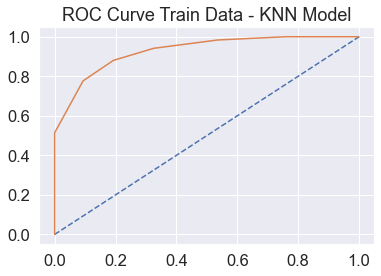

In [833]:
# predict probabilities
probs = knn_3.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_cart = roc_auc_score(y_train, probs)
print('AUC score of Train data using KNN Model is: %.3f' % auc_cart)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - KNN Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the KNN Model is 0.928. This means that 92.8% chance that the model will be able to distinguish between positive class and negative class.

**AUC and ROC for the test data**

AUC score of Test data using KNN Model is: 0.873


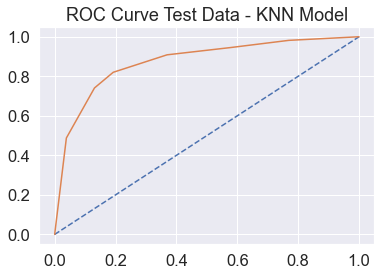

In [834]:
# predict probabilities
probs = knn_3.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_cart = roc_auc_score(y_test, probs)
print('AUC score of Test data using KNN Model is: %.3f' % test_auc_cart)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - KNN Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in KNN Model is 0.873. This means that 87.3% chance that the model will be able to distinguish between positive class and negative class.

**e)Random Forest Model**

**AUC and ROC for the train data**

AUC score of Train data using Random Forest Model is: 0.931


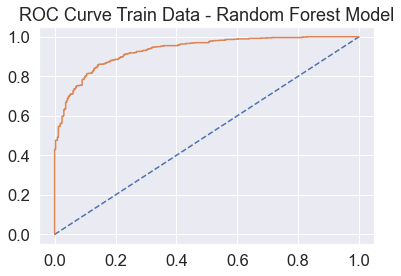

In [835]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_cart = roc_auc_score(y_train, probs)
print('AUC score of Train data using Random Forest Model is: %.3f' % auc_cart)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - Random Forest Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the Random Forest Model is 0.931. This means that 93.1% chance that the model will be able to distinguish between positive class and negative class.

**AUC and ROC for the test data**

AUC score of Test data using Random Forest Model is: 0.894


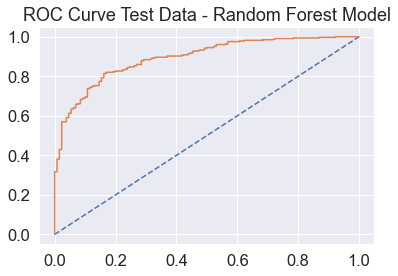

In [836]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_cart = roc_auc_score(y_test, probs)
print('AUC score of Test data using Random Forest Model is: %.3f' % test_auc_cart)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - Random Forest Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in Random Forest Model is 0.894. This means that 89.4% chance that the model will be able to distinguish between positive class and negative class.

**f)Bagging Model**

**AUC and ROC for the train data**

AUC score of Train data using Bagging Model is: 0.890


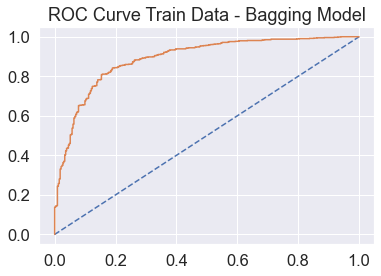

In [837]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_cart = roc_auc_score(y_train, probs)
print('AUC score of Train data using Bagging Model is: %.3f' % auc_cart)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - Bagging Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the Bagging Model is 0.890. This means that 89% chance that the model will be able to distinguish between positive class and negative class.

**AUC and ROC for the test data**

AUC score of Test data using Bagging Model is: 0.890


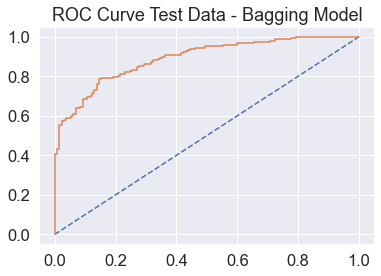

In [839]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_cart = roc_auc_score(y_test, probs)
print('AUC score of Test data using Bagging Model is: %.3f' % test_auc_cart)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - Bagging Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in Bagging  Model is 0.89. This means that 89% chance that the model will be able to distinguish between positive class and negative class.
•	Both have equal AUC score.


**g) Adaptive Boosting  boosting Model**

AUC score of Train data using Adaptive boosting Model is: 0.916


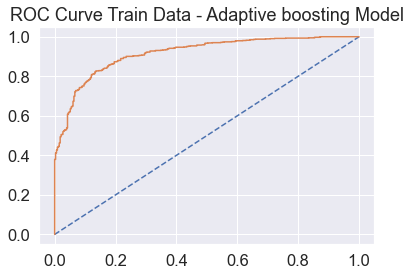

In [842]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_cart = roc_auc_score(y_train, probs)
print('AUC score of Train data using Adaptive boosting Model is: %.3f' % auc_cart)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - Adaptive boosting Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the Adaptive Boosting Model is 0.916. This means that 91.6% chance that the model will be able to distinguish between positive class and negative class.


**AUC and ROC for the test data**

AUC score of Test data using Adaptive boosting Model is: 0.905


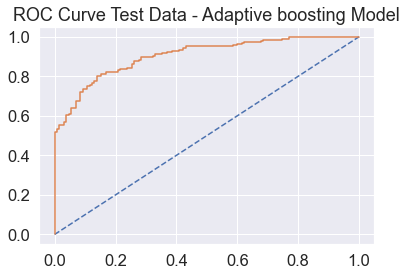

In [843]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_cart = roc_auc_score(y_test, probs)
print('AUC score of Test data using Adaptive boosting Model is: %.3f' % test_auc_cart)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - Adaptive boosting Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in Adaptive Boosting  Model is 0.905. This means that 90.5% chance that the model will be able to distinguish between positive class and negative class.

**h)Gradient boosting Model**

**AUC and ROC for the train data**

AUC score of Train data using Gradient boosting Model is: 0.950


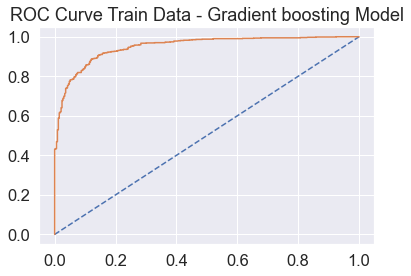

In [844]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_cart = roc_auc_score(y_train, probs)
print('AUC score of Train data using Gradient boosting Model is: %.3f' % auc_cart)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title("ROC Curve Train Data - Gradient boosting Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

•	We can see that AUC score for Train data in the Gradient Boosting Model is 0.95. This means that 95 % chance that the model will be able to distinguish between positive class and negative class.

**AUC and ROC for the test data**

AUC score of Test data using Gradient boosting Model is: 0.905


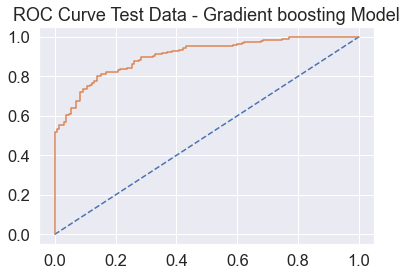

In [845]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_cart = roc_auc_score(y_test, probs)
print('AUC score of Test data using Gradient boosting Model is: %.3f' % test_auc_cart)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title("ROC Curve Test Data - Gradient boosting Model")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

•	We can see that AUC score of Test data in Gradient Boosting Model is 0.905. This means that 90.5% chance that the model will be able to distinguish between positive class and negative class.

**Model Comparison based on performance metrics**

**Insights**

•	Interest Class here is 0 & 1 (i.e) Both “Labour” & “Conservative” party.

•	F 1 -score refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare F1-score for all the models.

•	We can see that “Gradient Boosting” , “KNN Model” , “Random Forest” model is showing a higher F1-score values. 

•	But comparatively KNN Model shows slight Overfitting too.

•	Hence we shall apply SMOTE to the above three models and check for improvement.


## **SMOTE**

In [211]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [213]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [268]:
X_train_res_scale, y_train_res_scale = sm.fit_resample(X_train_scaled, y_train.ravel())

In [214]:
## Let's check the shape after SMOTE
X_train_res.shape


(1470, 8)

In [217]:
y_train_res.shape

(1470,)

### **Gradient Boosting with SMOTE**

In [226]:
gbcl_sm = GradientBoostingClassifier(n_estimators = 60,random_state=1)
gbcl_sm = gbcl_sm.fit(X_train_res, y_train_res)

In [227]:
## Performance Matrix on train data set
y_train_predict_gb_sm = gbcl_sm.predict(X_train_res)
y_test_predict_gb_sm = gbcl_sm.predict(X_test)
model_score =gbcl.score(X_train_res, y_train_res)
print("The Model score is", model_score)
print("The confusion matrix \n", metrics.confusion_matrix(y_train_res, y_train_predict_gb_sm))
print("\nTrain data\n", metrics.classification_report(y_train_res, y_train_predict_gb_sm))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict_gb_sm))

The Model score is 0.8564625850340136
The confusion matrix 
 [[664  71]
 [ 77 658]]

Train data
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       735
           1       0.90      0.90      0.90       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470


Test data
               precision    recall  f1-score   support

           0       0.66      0.77      0.71       130
           1       0.90      0.84      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.83      0.82      0.82       458



In [233]:
param_grid_gbs_sm = {
    'n_estimators': [100, 500],
    'learning_rate': [1, 5],
    'random_state': [1, 150]
}

gbs_sm = GradientBoostingRegressor(random_state=1)

grid_search_gbs_sm = GridSearchCV(estimator = gbs_sm ,  param_grid = param_grid_gbs_sm, cv = 3, scoring = 'f1' )

In [230]:
grid_search_gbs.fit(X_train_res,y_train_res)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=1),
             param_grid={'learning_rate': [1, 5], 'n_estimators': [100, 500],
                         'random_state': [1, 150]},
             scoring='f1')

In [234]:
print(grid_search_gbs.best_params_)

{'learning_rate': 5, 'n_estimators': 100, 'random_state': 1}


In [235]:
gbcl_sm1 = GradientBoostingClassifier(n_estimators = 100,random_state=1 , learning_rate = 5)
gbcl_sm1 = gbcl_sm1.fit(X_train_res, y_train_res)

In [236]:
## Performance Matrix on train data set
y_train_predict_gb_sm = gbcl_sm1.predict(X_train_res)
y_test_predict_gb_sm = gbcl_sm1.predict(X_test)
model_score =gbcl_sm1.score(X_train_res, y_train_res)
print("The Model score is", model_score)
print("The confusion matrix \n", metrics.confusion_matrix(y_train_res, y_train_predict_gb_sm))
print("\nTrain data\n", metrics.classification_report(y_train_res, y_train_predict_gb_sm))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict_gb_sm))

The Model score is 0.8013605442176871
The confusion matrix 
 [[645  90]
 [202 533]]

Train data
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       735
           1       0.86      0.73      0.78       735

    accuracy                           0.80      1470
   macro avg       0.81      0.80      0.80      1470
weighted avg       0.81      0.80      0.80      1470


Test data
               precision    recall  f1-score   support

           0       0.51      0.88      0.65       130
           1       0.93      0.67      0.78       328

    accuracy                           0.73       458
   macro avg       0.72      0.77      0.71       458
weighted avg       0.81      0.73      0.74       458



**Insights**

* We can see that After applying smote, the F1-score is not satisfying. The model is underfitted

### **Gradient Boosting with scaled data**

In [259]:
gbcl_sm1 = GradientBoostingClassifier(n_estimators = 100,random_state=1 , learning_rate = 5)
gbcl_sm1 = gbcl_sm1.fit(X_train_scaled, y_train)

In [260]:
## Performance Matrix on train data set
y_train_predict_gb_sm = gbcl_sm1.predict(X_train_scaled)
y_test_predict_gb_sm = gbcl_sm1.predict(X_test_scaled)

model_score =gbcl_sm1.score(X_train_scaled, y_train)
print("The Model score is", model_score)

print("The confusion matrix \n", metrics.confusion_matrix(y_train, y_train_predict_gb_sm)
     )
print("\nTrain data\n", metrics.classification_report(y_train, y_train_predict_gb_sm))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict_gb_sm))

The Model score is 0.8078725398313027
The confusion matrix 
 [[262  70]
 [135 600]]

Train data
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       332
           1       0.90      0.82      0.85       735

    accuracy                           0.81      1067
   macro avg       0.78      0.80      0.79      1067
weighted avg       0.82      0.81      0.81      1067


Test data
               precision    recall  f1-score   support

           0       0.57      0.82      0.67       130
           1       0.91      0.75      0.83       328

    accuracy                           0.77       458
   macro avg       0.74      0.79      0.75       458
weighted avg       0.82      0.77      0.78       458



SCaling has no effect on Gradient Boosting model. The F1-scaore has under performed and the model is valid.**

### Random Forest with SMOTE

In [249]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 12],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50],
    'n_estimators': [50, 150]
}

rfr_sm = RandomForestRegressor(random_state=123)

grid_search_rf = GridSearchCV(estimator = rfr_sm, param_grid = param_grid, cv = 3 , scoring = 'f1' )

In [250]:
grid_search_rf.fit(X_train_res,y_train_res)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 12],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50],
                         'n_estimators': [50, 150]},
             scoring='f1')

In [251]:
print(grid_search_rf.best_params_)

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 50}


In [254]:
from sklearn.ensemble import RandomForestClassifier
rfcl_sm = RandomForestClassifier(n_estimators = 50,max_depth = 7, max_features = 4, min_samples_leaf = 3, min_samples_split = 30)
rfcl_sm = rfcl_sm.fit(X_train_res, y_train_res)

In [255]:
## Performance Matrix on train data set
y_train_predict_sm = rfcl_sm.predict(X_train_res)
y_test_predict_sm = rfcl_sm.predict(X_test)

model_score =rfcl_sm.score(X_train_res, y_train_res)

print("The Model score is", model_score)
print("The confusion matrix \n", metrics.confusion_matrix(y_train_res, y_train_predict_sm))

print("\nTrain data\n", metrics.classification_report(y_train_res, y_train_predict_sm))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict_sm))

The Model score is 0.889795918367347
The confusion matrix 
 [[657  78]
 [ 75 660]]

Train data
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       735
           1       0.89      0.90      0.90       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470


Test data
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       130
           1       0.90      0.85      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



**We can see that after smoting, the f1-scaore increased to 0.90 but on test data it is 0.71. Hence it is underfitted.**

### Scaled Random Forest Model

In [293]:
from sklearn.ensemble import RandomForestClassifier
rfcl_sm = RandomForestClassifier(n_estimators = 50,max_depth = 7, max_features = 4, min_samples_leaf = 3, min_samples_split = 30)
rfcl_sm = rfcl_sm.fit(X_train_res_scale, y_train_res_scale)

In [294]:
## Performance Matrix on train data set
y_train_predict_sm = rfcl_sm.predict(X_train_res_scale)
y_test_predict_sm = rfcl_sm.predict(X_test_scaled)

model_score =rfcl_sm.score(X_train_res_scale, y_train_res_scale)
print("The Model score is", model_score)

print("The confusion matrix \n", metrics.confusion_matrix(y_train_res_scale, y_train_predict_sm))

print("\nTrain data\n", metrics.classification_report(y_train_res_scale, y_train_predict_sm))
print("\nTest data\n", metrics.classification_report(y_test, y_test_predict_sm))

The Model score is 0.8816326530612245
The confusion matrix 
 [[640  95]
 [ 79 656]]

Train data
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       735
           1       0.87      0.89      0.88       735

    accuracy                           0.88      1470
   macro avg       0.88      0.88      0.88      1470
weighted avg       0.88      0.88      0.88      1470


Test data
               precision    recall  f1-score   support

           0       0.67      0.79      0.73       130
           1       0.91      0.85      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.83      0.84       458



**We can see that the metrics have drastically improved.There is a slight overfitting for Class 1 in F1-score. But overall model performance is good**

## KNN with SMOTE

In [278]:
knn_4 = KNeighborsClassifier(n_neighbors=14)
knn_4.fit(X_train_res_scale, y_train_res_scale)

KNeighborsClassifier(n_neighbors=14)

In [277]:
knn_pred_train_sm = knn_4.predict(X_train_res_scale)
knn_pred_test_sm = knn_4.predict(X_test_scaled)
print("\nTrain data\n", metrics.classification_report(y_train_res_scale, knn_pred_train_sm))
print("\nTest data\n", metrics.classification_report(y_test, knn_pred_test_sm))


Train data
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       735
           1       0.87      0.82      0.84       735

    accuracy                           0.85      1470
   macro avg       0.85      0.85      0.85      1470
weighted avg       0.85      0.85      0.85      1470


Test data
               precision    recall  f1-score   support

           0       0.62      0.85      0.72       130
           1       0.93      0.79      0.86       328

    accuracy                           0.81       458
   macro avg       0.78      0.82      0.79       458
weighted avg       0.84      0.81      0.82       458



In [275]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(X_train_res_scale, y_train_res_scale)
    # evaluate test accuracy
    scores = knn_new.score(X_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22489082969432317,
 0.23144104803493448,
 0.22489082969432317,
 0.21615720524017468,
 0.20524017467248912,
 0.20087336244541487,
 0.1899563318777293,
 0.20305676855895194,
 0.1986899563318777,
 0.19432314410480345]

**Insights**

* We can see that after applying smote KNN model performed well in Train data. But in test data it is underfitted for Class 0.
* But it performs well for Class 1.

### Naive Bayes with SMOTE

In [279]:
nb_sm = GaussianNB()
nb_sm.fit(X_train_res, y_train_res)

GaussianNB()

In [280]:
nb_pred_train = nb_sm.predict(X_train_res)
nb_pred_test = nb_sm.predict(X_test)

In [282]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,nb_pred_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,nb_pred_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.82      0.83       735
           1       0.83      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.61      0.78      0.68       130
           1       0.90      0.80      0.85       328

    accuracy                           0.79       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.79      0.80       458
 



**Insights**

* We can see that for Class 1 the model performs better in Test. But for Class 0 it has huge difference between Train and Test.

### Logistic Regression with Smote

In [283]:
model_logistic_sm = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=2)
model_logistic_sm.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [284]:
ytrain_predict_log = model_logistic_sm.predict(X_train_res)
ytest_predict_log = model_logistic_sm.predict(X_test)

In [285]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,ytrain_predict_log),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_log),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       735
           1       0.83      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.62      0.78      0.69       130
           1       0.90      0.81      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.80      0.81       458
 



**Insights**

* We can see that for Class 1 the model performs better in Test. But for Class 0 it has huge difference between Train and Test.

### LDA with Smote

In [287]:
lda = LinearDiscriminantAnalysis()
model_lda_sm=lda.fit(X_train_res, y_train_res)
model_lda_sm

LinearDiscriminantAnalysis()

In [288]:
# Training Data Class Prediction with a cut-off value of 0.5
y_train_predict_lda = model_lda_sm.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
y_test_predict_lda = model_lda_sm.predict(X_test)

In [289]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,y_train_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       735
           1       0.83      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.62      0.78      0.69       130
           1       0.90      0.81      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.80      0.81       458
 



**Insights**

* The model performs better for Class 1 in Test. But for Class 0 it has huge difference between Train and Test.

**Conclusion**

•	For this Problem 1, we consider F1-score as an important parameter where  RECALL & PRECISION is considered.

•	Class 1 “Labour Party” and Class 0 “Conservative Party” both are equally important. Hence our model is required to reduce both FALSE NEGATIVE & FALSE POSITIVE.

•	With this F1-score metrics, comparing all the models after SMOTE technique, we can see that Random Forest with Smote & Scaled data performs better in terms of Class 1 “Labour Party”. But difference between Class 0 of Train & Test data is huge.

•	In KNN Model with SMOTE, the Class 1 is performing well but Class 0 has slightly underfitted.

•	From these two model performance we can observe that Class 0 is slightly underperforming in terms of F1-score.

•	On the whole, model performance increased with SMOTE and scaling of data.

•	The AUC score of KNN Model is 0.92 & 0.873 on Train & Test data. 

•	In Random Forest model, the AUC and ROC score is 0.93 & 0.894 on Train & Test data.

•	The Confusion matrix of Random Forest & KNN Model has lesser False Positives and Negatives compared to other models.

Thus RANDOM FOREST MODEL WITH SMOTE & SCALED DATA is the best optimal model for predicting the EXIT POLL that will help in predicting overall win and seats covered by a particular party. RANDOM FOREST Model can comparatively reduce both Type 1 & Type 2 Error which is in this case reducing False Negatives (FN) and False Positive (FP) and increasing the F1-Score. The comparability of these values suggests that our RANDOM FOREST MODEL WITH SMOTE & SCALED DATA is unbiased and hence a good fit.



### 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

**Insights**


•	“Labour” party supporters are highest with 1063. The “Conservative” party supporters are only 462.

•	The median value for “Age” is around 50-55 years which signifies that most of the people who vote are approximately 50 years old.

•	On the survey, “economic.cond.national”, the assessment of current national economic condition is in the average of 3.24 which signifies that people feel that the current party is serving them good Economic Conditions.

•	The “economic.cond.household” column has mean of 3.14, which signifies that current government is providing people with above average Household condition.

•	“Blair”, the Labour leader has on an average 3.3 rating and has rating “4” as highest. Around 836 people have assessed him with rating as 4.

•	Hague”, the conservative leader has on an average 2.7 rating. He has rating “2.5 (plus)” as highest. Around 622 people have assessed him with rating as 2.

•	“Europe” feature which measures respondents' attitudes toward European integration has an average value of 6.7 . 75% people have rated 10. Around 338 people have ‘Eurosceptic’ sentiment as they have rated 11 which is the highest. 

•	On an average, the ‘Eurosceptic’ sentiment among Labour party supporters are less compared to Conservative party supporters based on the median value of “Europe” feature.

•	The “political.knowledge” column has mean value of 1.54 . 75% values are 2. The “political.knowledge” has outliers. The Knowledge of parties' positions on European integration is rated high for Labour party supporters.

•	782 people have good assessment on Political Knowledge of parties' positions on European integration as they have rated 2 which is near highest value.

•	The “gender” column has Female on top with 812 values. "Female" have maximum count than “Male” party. 812 female voters and 713 male voters. 

**Conclusion & Recommendation:**

•	The average Age of Females who voted in Election is 53 years which is higher than Male.

•	Around 542 people have given rating of 4 for Current Economic condition. 400 people rated 4 for Household conditions which signifies that current government is providing people with above average Household condition and serving them good Economic Conditions. This can favour victory for current ruling government.

•	The ‘Eurosceptic’ sentiment on an average is Highest for Female than Male. This  sentiment among Labour party supporters are less compared to Conservative party supporters.

•	Blair has more supporters than Hague which may impact on Election results turning in favour of Blair, the Labour leader.

•	There is an equal support for both Labour & Conservative Party leaders, Blair & Hague in terms of GENDER.  But on the whole the number of Female voters slightly outweigh the male denoting that Election Vote depends on the “Gender” feature and the Female Supporters are more for Labour party.

•	On Knowledge of party’s positions on European integration, the Male slightly outweigh female, in terms of scale of 0 to 3. Where Males feel that parties have knowledge on European integration.

•	Based on Feature Importance insights, the “GENDER” feature plays an important role. Hence concentrating on Female voters can increase the chance of party’s victory.

•	The “political.knowledge” feature plays a very important role because the people feel that the parties should possess good political knowledge especially when it comes to European integration. 

•	There are few Labour party supporters who feel that “Hague”, conservative party leader also performs equally as the labour leader.

•	‘Eurosceptic’ sentiment is higher for Conservative party people, which is important feature for determining Election result. 

•	Males favour more Eurosceptic sentiment than Females. 


Thus the EXIT POLL can be predicted with the Random Forest Model with SMOTE and Scaled data where the Model predicts the party win based on Election surveys from people. With the given data of 1525 people survey, we can predict that Labour party is likely to win the recent Elections. 


# Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

**The Natural Language Toolkit (NLTK) is a language and text processing module for Python. NLTK can analyze, process, and tokenize text available in many different languages using its built-in library of corpora and large pool of lexical data.**

### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [1]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
import string
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Airciti\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Airciti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Airciti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [3]:
# characters in text file

print("The number of characters in Roosevelt.txt file is", len(inaugural.raw('1941-Roosevelt.txt')))
print("The number of characters in Kennedy.txt file is", len(inaugural.raw('1961-Kennedy.txt')))
print("The number of characters in Nixon.txt file is", len(inaugural.raw('1973-Nixon.txt')))

The number of characters in Roosevelt.txt file is 7571
The number of characters in Kennedy.txt file is 7618
The number of characters in Nixon.txt file is 9991


In [847]:
# No. of Words in a file

print("The number of words in Roosevelt.txt file is", len(inaugural.words('1941-Roosevelt.txt')))
print("The number of words in Kennedy.txt file is", len(inaugural.words('1961-Kennedy.txt')))
print("The number of words in Nixon.txt file is", len(inaugural.words('1973-Nixon.txt')))

The number of words in Roosevelt.txt file is 1536
The number of words in Kennedy.txt file is 1546
The number of words in Nixon.txt file is 2028


**Insights**

•	We can observe that '1941-Roosevelt.txt' file has 7571 characters, '1961-Kennedy.txt' has 7618 characters and '1973-Nixon.txt' has 9991 characters.

•	This count of characters includes space, alphanumeric, special characters in the raw text file.


In [849]:
# No. of sentences in a file

print("The number of senetences in Roosevelt.txt file is", len(inaugural.sents('1941-Roosevelt.txt')))
print("The number of senetences in Kennedy.txt file is", len(inaugural.sents('1961-Kennedy.txt')))
print("The number of senetences in Nixon.txt file is", len(inaugural.sents('1973-Nixon.txt')))

The number of senetences in Roosevelt.txt file is 68
The number of senetences in Kennedy.txt file is 52
The number of senetences in Nixon.txt file is 69


**Insights**

•	We can observe that '1941-Roosevelt.txt' file has 1536 words, '1961-Kennedy.txt' has 1546 words and '1973-Nixon.txt' has 2028 words.

•	This count of characters includes space, alphanumeric, special characters in the raw text file.


In [ ]:
print "The number of sentences =", len(corpusReader.sents())
print "The number of patagraphs =", len(corpusReader.paras())
print "The number of words =", len([word for sentence in corpusReader.sents() for word in sentence])
print "The number of characters =", len([char for sentence in corpusReader.sents() for word in sentence for char in word])

In [850]:
inaugural.sents('1941-Roosevelt.txt')[0]

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.']

**Insights**

•	We can observe that '1941-Roosevelt.txt' file has 68 sentences, '1961-Kennedy.txt' has 50 sentences and '1973-Nixon.txt' has 69 sentences.

•	This sentences are counted based on “.” Where it demarcates the end of sentence.


In [229]:
char=[]
for line in roosevelt:
    for word in line.split():
        char.append(word)
        

print(len(char))

6174


In [222]:
len(roosevelt)

7571

### **2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.**

In [12]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Airciti\AppData\Roaming\nltk_data...


True

In [28]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn

In [29]:
Roosevelt_words = inaugural.words('1941-Roosevelt.txt')
Kennedy_words = inaugural.words('1961-Kennedy.txt')
Nixon_words = inaugural.words('1973-Nixon.txt')

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
extra_punctuation = ['--','``','"','/',"'",","]
#stemmer = SnowballStemmer("english")
word_lematize = WordNetLemmatizer() 

In [32]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) + list(extra_punctuation)

# Only keeping the words which are not the 'stopwords'
Roosevelt_words_clean = [word for word in Roosevelt_words if word not in stopwords]
Kennedy_words_clean = [word for word in Kennedy_words if word not in stopwords]
Nixon_words_clean = [word for word in Nixon_words if word not in stopwords]

In [33]:
# Stemming of text

#print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

Roosevelt_words_clean = [word_lematize.lemmatize(i) for i in Roosevelt_words_clean]
Kennedy_words_clean = [word_lematize.lemmatize(j) for j in Kennedy_words_clean]
Nixon_words_clean = [word_lematize.lemmatize(k) for k in Nixon_words_clean]

In [34]:
#all_words = (w.lower() for w in Roosevelt_words_clean.words()) 
Roosevelt_words_clean = [word.lower() for word in Roosevelt_words_clean]
Kennedy_words_clean = [word.lower() for word in Kennedy_words_clean]
Nixon_words_clean = [word.lower() for word in Nixon_words_clean]

In [35]:
Roosevelt_words_clean

['on',
 'national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'in',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'in',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'in',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institution',
 'disruption',
 'without',
 'to',
 'u',
 'come',
 'time',
 'midst',
 'swift',
 'happening',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'if',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nation',
 'determined',
 'count',
 'year',
 'lifetime',
 'human',
 'spirit',
 'the',
 'life',
 'man',
 'three',
 'score',
 'year',
 'ten',
 'little',
 'little',
 'le',
 'the',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'there',
 'men',
 'doubt',
 'there',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',

In [36]:
# stopwords removal

print("The Inaugral speech of President Roosevelt text file before Stopwords removal is",len(inaugural.words('1941-Roosevelt.txt')),"and after removal is ", len(Roosevelt_words_clean))
print("The Inaugral speech of President Kennedy text file before Stopwords removal is",len(inaugural.words('1961-Kennedy.txt')),"and after removal is ", len(Kennedy_words_clean))
print("The Inaugral speech of President Nixon text file before Stopwords removal is",len(inaugural.words('1973-Nixon.txt')),"and after removal is ", len(Nixon_words_clean))

The Inaugral speech of President Roosevelt text file before Stopwords removal is 1536 and after removal is  695
The Inaugral speech of President Kennedy text file before Stopwords removal is 1546 and after removal is  739
The Inaugral speech of President Nixon text file before Stopwords removal is 2028 and after removal is  895


**Insights**

•	We can observe that there is huge difference between the No. of words in the 3 text files.

•	Before the stopwords removal, the word count was 1536, 1546, 2028 for Roosevelt, Kennedy, Nixon text files.

•	After the removal, the No. of words reduced to 695, 739, 895.


### Sample sentence

**President Roosevelt**

In [37]:
# before removal of stopwords

print('\033[1m' + "First Sentence of President Roosevelt text file Before removal of Stopwords: \n" + '\033[0m')
tokens = nltk.sent_tokenize(Roosevelt)
for t in tokens:
    print (t, "\n")
    break;

First Sentence of President Roosevelt text file Before removal of Stopwords: 

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States. 



In [38]:
print('\033[1m' + "First Sentence of President Roosevelt text file After removal of Stopwords: \n" + '\033[0m')
' '.join(Roosevelt_words_clean[0:12])

First Sentence of President Roosevelt text file After removal of Stopwords: 



'on national day inauguration since 1789 people renewed sense dedication united states'

•	We can see that the root words are not curbed and removed. The punctuation “,” is removed correctly.
•	Lemmatize() and stopwords has removed the unwanted characters and curbed the words to root word without changing its meaning.


**President Kennedy**

In [39]:
# before removal of stopwords

print('\033[1m' + "First Sentence of President Kennedy text file Before removal of Stopwords: \n" + '\033[0m')
tokens = nltk.sent_tokenize(Kennedy)
for t in tokens:
    print (t, "\n")
    break;

First Sentence of President Kennedy text file Before removal of Stopwords: 

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. 



In [40]:
print('\033[1m' + "First Sentence of President Kennedy text file After removal of Stopwords: \n" + '\033[0m')
' '.join(Kennedy_words_clean[0:33])

First Sentence of President Kennedy text file After removal of Stopwords: 



'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizen observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change'

•	We can see that the root words are not curbed and removed. The word “justice” remains the same and not curbed. The punctuation “- -“ is removed.
•	Lemmatize() and stopwords has removed the unwanted characters and curbed the words to root word without changing its meaning.


**President Nixon**

In [41]:
# before removal of stopwords

print('\033[1m' + "First Sentence of President Nixon text file Before removal of Stopwords: \n" + '\033[0m')
tokens = nltk.sent_tokenize(Nixon)
for t in tokens:
    print (t, "\n")
    break;

First Sentence of President Nixon text file Before removal of Stopwords: 

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home. 



In [42]:
print('\033[1m' + "First Sentence of President Nixon text file After removal of Stopwords:" + '\033[0m')
' '.join(Nixon_words_clean[0:33])

First Sentence of President Nixon text file After removal of Stopwords:


'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizen great good country share together when met four year ago america bleak spirit depressed prospect seemingly endless war abroad'

•	We can see that the root words are not curbed and removed. The word “America” remains the same. The delimiters “,” , “:” is removed.
•	Lemmatize() and stopwords has removed the unwanted characters and curbed the words to root word without changing its meaning.


### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

**Check Frequency of Words**

In [61]:
# Frequency of words in President Roosevelt speech

print("The Top 3 words that occur in President Roosevelt speech is",nltk.FreqDist(Roosevelt_words_clean).most_common(3))

The Top 3 words that occur in President Roosevelt speech is [('nation', 15), ('it', 13), ('the', 10)]


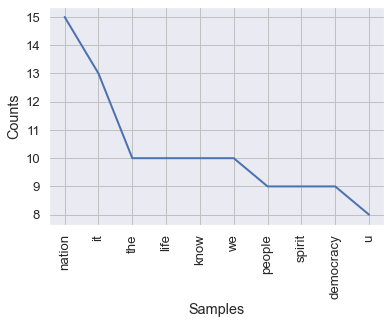

In [71]:
sns.set(font_scale=1.2)
roosevelt_freq = nltk.FreqDist(Roosevelt_words_clean)
roosevelt_freq.most_common(10)
roosevelt_freq.plot(10);

**Insights**

•	We can see that “nation” is the topmost word occurring 15 times. Followed by “it” which occurs 13 times and “the” occurs 10 times.

In [66]:
# Frequency of words in President Kennedy speech

print("The Top 3 words that occur in President Kennedy speech is",nltk.FreqDist(Kennedy_words_clean).most_common(3))

The Top 3 words that occur in President Kennedy speech is [('let', 16), ('u', 12), ('world', 8)]


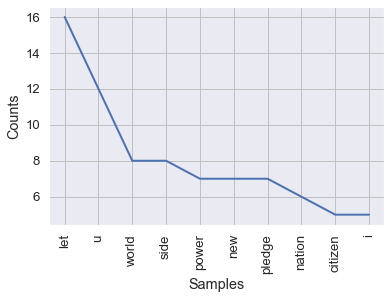

In [72]:
kennedy_freq = nltk.FreqDist(Kennedy_words_clean)
kennedy_freq.most_common(10)
kennedy_freq.plot(10);

**Insights**

•	We can see that “let” is the topmost word occurring 16 times. Followed by “u” which occurs 12 times and “world” occurs 8 times.

•	Here the word “us” has been stemmed to its root word “u” which changes the meaning. 


In [68]:
# Frequency of words in President Nixon speech

print("The Top 3 words that occur in President Nixon speech is",nltk.FreqDist(Nixon_words_clean).most_common(3))

The Top 3 words that occur in President Nixon speech is [('u', 26), ('let', 22), ('america', 21)]


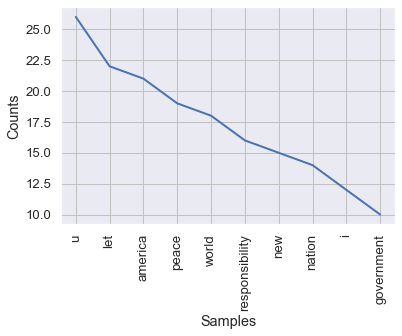

In [74]:
nixon_freq = nltk.FreqDist(Nixon_words_clean)
nixon_freq.most_common(10)
nixon_freq.plot(10);

**Insights**

•	We can see that “u” is the topmost word occurring 26 times. Followed by “let” which occurs 22 times and “america” occurs 21 times.

•	Here the word “us” has been stemmed to its root word “u” which changes the meaning. 


### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

### Creating a Wordcloud

In [47]:
# joining all words

word_roosevelt = ' '.join(Roosevelt_words_clean)
word_kennedy = ' '.join(Kennedy_words_clean)
word_nixon = ' '.join(Nixon_words_clean)

    Word Cloud of President Roosevelt Speech


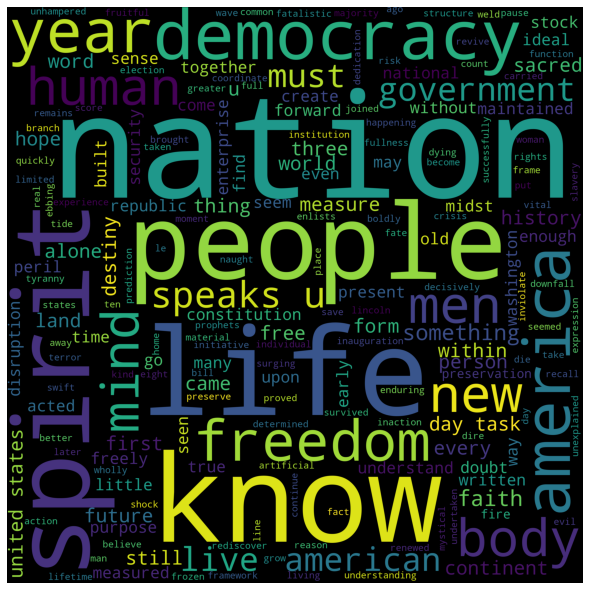

In [51]:
# word cloud

from wordcloud import WordCloud
wordcloud_roosevelt = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(word_roosevelt) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_roosevelt) 
plt.axis("off")
plt.xlabel('Word Cloud of President Roosevelt Speech')
plt.tight_layout(pad = 0) 

print('\033[1m' +"    Word Cloud of President Roosevelt Speech" + '\033[0m')

•	Word Cloud of Roosevelt Text File is shown above. The most frequently occurring words are shown in this word cloud.

    Word Cloud of President Kennedy Speech


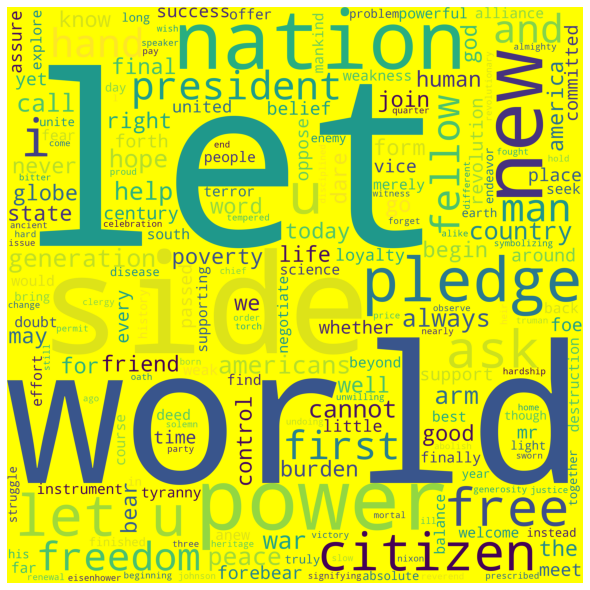

In [76]:
# word cloud of President Kennedy

from wordcloud import WordCloud
wordcloud_kennedy = WordCloud(width = 3000, height = 3000, 
                background_color ='yellow', 
                min_font_size = 10, random_state=100 , stopwords = ['sides','to','but','shall'] ).generate(word_kennedy) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_kennedy) 
plt.axis("off")
plt.xlabel('Word Cloud of President Kennedy Speech')
plt.tight_layout(pad = 0) 

print('\033[1m' +"    Word Cloud of President Kennedy Speech" + '\033[0m')

•	Word Cloud of Kennedy Text File is shown above. The most frequently occurring words are shown in this word cloud.

    Word Cloud of President Nixon Speech


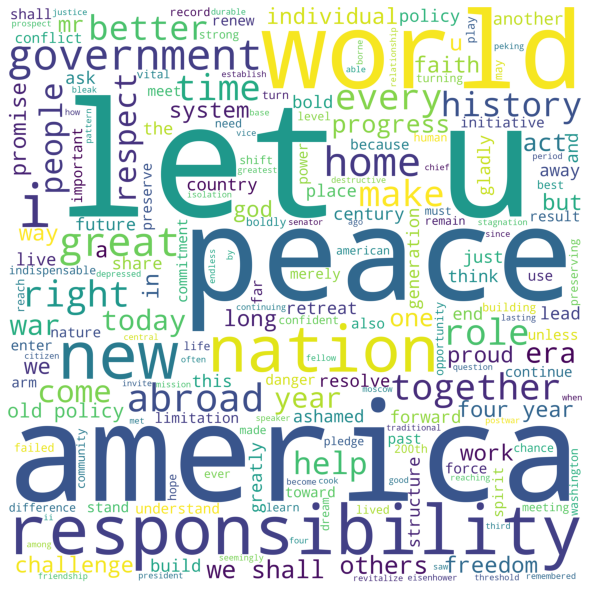

In [75]:
# word cloud of Presiden Nixon

from wordcloud import WordCloud
wordcloud_nixon = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100 , stopwords = []).generate(word_nixon) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_nixon) 
plt.axis("off")
plt.xlabel('Word Cloud of President Nixon Speech')
plt.tight_layout(pad = 0) 

print('\033[1m' +"    Word Cloud of President Nixon Speech" + '\033[0m')

•	Word Cloud of Nixon Text File is shown above. The most frequently occurring words are shown in this word cloud.